# ABOUT


Datascientest's Datascientist continuous bootcamp - cohorte Mars2022 -  AeroBOT project

**Tutor**

* Alban THUET

**Authors:**

* [Ioannis STASINOPOULOS](https://www.linkedin.com/in/ioannis-stasinopoulos/)

</br>

---
</br>

**Version History**

Version | Date       | Author(s)  | Modification
--------|----------- | ---------  | --------------------------
1.0     | 30/11/2022 | I.S.       | Document creation

**This notebook does the necessary data preprocessing for the STREAMLIT demo of our project.**

It is based on notebook `06 Model Comparison Plot (Baseline DT_Raw).ipynb`

# IMPORT PACKAGES


In [1]:
#######################
# Import packages
#######################
import numpy as np
import seaborn as sns
import math # for math.pi etc.
import time # time code execution

#######################
# Pandas
#######################
import pandas as pd
# Set pandas settings to show all data when using .head(), .columns etc.
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option("display.colheader_justify","left") # left-justify the print output of pandas

### Display full columnwidth
# Set pandas settings to display full text columns
#pd.options.display.max_colwidth = None
# Restore pandas settings to display standard colwidth
pd.reset_option('display.max_colwidth')

import itertools # Pour créer des iterateurs

# Package to show the progression of pandas operations
from tqdm import tqdm
# from tqdm.auto import tqdm  # for notebooks

# Create new `pandas` methods which use `tqdm` progress
# (can use tqdm_gui, optional kwargs, etc.)
tqdm.pandas()
# simply use .progress_apply() instead of .apply() on your pd.DataFram

######################
# PLOTTING
######################
import matplotlib.pyplot as plt
%matplotlib inline


###############################
# Other
###############################
import pickle as pkl # Saving data externally

# LOAD DATA

## Mount GDrive

In [2]:
#@title
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive/')

#check your present working directory 
%pwd

Mounted at /content/drive/


'/content'

In [3]:
#@title
# move to the transformed data location (you can create a deeper structure, if needed, e.g. to save a trained model):
%cd /content/drive/MyDrive/data/transformed/

/content/drive/MyDrive/data/transformed


In [4]:
#@title
!ls # list the content of the pwd

#!ls "/content/drive/MyDrive/Data_Science/Formations/DataScienceTest/projet/AeroBot/" # list contect of a speficic folder

 complaints-2022-08-05_13_55.csv
'Copy of Qualified abbreviations_20220718.xlsx.gsheet'
'Data Dictionnary.xlsx'
 data_for_BERT_multilabel_20220805.pkl
 df_for_Anomaly_prediction.pkl
 df_test_for_Anomaly_prediction.pkl
 model.png
 model_results
 Narrative_PP_stemmed_24072022_TRAIN.pkl
 Narrative_Raw_Stemmed_24072022_TRAIN.pkl
 Narrative_RegEx_subst_21072022_TRAIN.pkl
'Qualified abbreviations_20220707_test.csv'
'Qualified abbreviations_20220708.csv'
'Qualified abbreviations_20220718.csv'
'Qualified abbreviations_20220718_Google_sheet.gsheet'
 STREAMLIT_demo_data
 test_data_final.pkl
 train_data_final.pkl





## Load 1 VS ALL - BASELINE MODEL - dataframes from .pkl file 
- 1 vs all  classification report format


In [5]:
# Import DataFrames into a list
%cd /content/drive/MyDrive/data/transformed/model_results

filename_list = [
                  'df_metrics_DT_RAW.pkl',            
           
                 ]

df_list = []

for filename in filename_list:
  # Load the files
  with open(filename, "rb") as f:
    loaded_file = pkl.load(f)
    df_list.append(loaded_file[0])

print(f"Files {filename_list} loaded")
  
model_results_1vsall_BLM = pd.concat(df_list)
# Reset index, otherwise you get a repetition of 0,1,2,3
model_results_1vsall_BLM = model_results_1vsall_BLM.reset_index().drop(columns =['index'])

/content/drive/MyDrive/data/transformed/model_results
Files ['df_metrics_DT_RAW.pkl'] loaded


In [6]:
# Check of the df length ; for each model : must contain 4 metrics rows for each of the 14 anomalies 
print('Check of df size :',len(model_results_1vsall_BLM), ' must be equal to ',14*4*len(filename_list))

Check of df size : 56  must be equal to  56


In [7]:
model_results_1vsall_BLM.head()


,classifier,preprocessing,undersampling,Count_Vectorizer_opts,anomaly,metric,0,1,accuracy,macro avg,weighted avg
0,Decision Tree,0,0,NaN,Anomaly_Deviation / Discrepancy - Procedural,precision,0.640894,0.705148,0.685741,0.673021,0.679487
1,Decision Tree,0,0,NaN,Anomaly_Deviation / Discrepancy - Procedural,recall,0.484704,0.819415,0.685741,0.652059,0.685741
2,Decision Tree,0,0,NaN,Anomaly_Deviation / Discrepancy - Procedural,f1-score,0.551962,0.757999,0.685741,0.654981,0.675714
3,Decision Tree,0,0,NaN,Anomaly_Deviation / Discrepancy - Procedural,support,7747.000000,11651.000000,0.685741,19398.000000,19398.000000
4,Decision Tree,0,0,NaN,Anomaly_Aircraft Equipment,precision,0.842790,0.822690,0.835602,0.832740,0.834846


### Transform in Common format : 

In [8]:
# label of the model , including options
model_results_1vsall_BLM['approach']='(1) Base line model'
model_results_1vsall_BLM['model_label']=model_results_1vsall_BLM['classifier']  \
                                  +'/'+model_results_1vsall_BLM['preprocessing'].apply(lambda x: 'Raw' if x==0 else 'PP') \
                                  +'/'+model_results_1vsall_BLM['undersampling'].apply(lambda x: 'Std sampling' if x==0 else 'Under sampling') \
                                  +'/'+model_results_1vsall_BLM['Count_Vectorizer_opts'].apply(lambda x: '' if str(x)=='nan' else str(x))
      

In [9]:
model_results_1vsall_BLM_select=model_results_1vsall_BLM[['approach','model_label','classifier','preprocessing','undersampling','anomaly','metric','1']]

In [10]:
model_results_1vsall_BLM_select.head()

,approach,model_label,classifier,preprocessing,undersampling,anomaly,metric,1
0,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Deviation / Discrepancy - Procedural,precision,0.705148
1,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Deviation / Discrepancy - Procedural,recall,0.819415
2,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Deviation / Discrepancy - Procedural,f1-score,0.757999
3,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Deviation / Discrepancy - Procedural,support,11651.000000
4,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Aircraft Equipment,precision,0.822690


## Load 1 VS ALL - UNSUPERVISED dataframes from .pkl file 
- 1 vs all  classification report format

In [11]:
# Import DataFrames into a list
%cd /content/drive/MyDrive/data/transformed/model_results/


filename_list = [
                 'df_metrics_DT_PP_RN_MDF_12.pkl', 
                 'df_metrics_DT_PP_US_RN_MDF.pkl',
                   'df_metrics_DT_PP_RN_MDF_100.pkl',
                   'df_metrics_DT_PP_RN_MDF_1600.pkl',

                  'df_metrics_RF_PP_RN_MDF_12.pkl',   
                'df_metrics_RF_PP_US_RN_MDF.pkl',
                'df_metrics_RF_PP_RN_MDF_100.pkl',
                   'df_metrics_RF_PP_RN_MDF_1600.pkl'

                 ]

df_list = []

for filename in filename_list:
  # Load the files
  with open(filename, "rb") as f:
    loaded_file = pkl.load(f)
    df_list.append(loaded_file[0])

print(f"Files {filename_list} loaded")
  
model_results_1vsall_UFS = pd.concat(df_list)
# Reset index, otherwise you get a repetition of 0,1,2,3
model_results_1vsall_UFS = model_results_1vsall_UFS.reset_index().drop(columns =['index'])

/content/drive/MyDrive/data/transformed/model_results
Files ['df_metrics_DT_PP_RN_MDF_12.pkl', 'df_metrics_DT_PP_US_RN_MDF.pkl', 'df_metrics_DT_PP_RN_MDF_100.pkl', 'df_metrics_DT_PP_RN_MDF_1600.pkl', 'df_metrics_RF_PP_RN_MDF_12.pkl', 'df_metrics_RF_PP_US_RN_MDF.pkl', 'df_metrics_RF_PP_RN_MDF_100.pkl', 'df_metrics_RF_PP_RN_MDF_1600.pkl'] loaded


In [12]:
# Check of the df length ; for each model : must contain 4 metrics rows for each of the 14 anomalies 
print('Check of df size :',len(model_results_1vsall_UFS), ' must be equal to ',14*4*len(filename_list))

Check of df size : 448  must be equal to  448


In [13]:
#model_results_1vsall_UFS['Count_Vectorizer_opts'] = model_results_1vsall_UFS['Count_Vectorizer_opts'].apply(lambda x:x[-4:] if x[-4]!= '=' else x[-3:]).astype('int')

In [14]:
model_results_1vsall_UFS.head()

,anomaly,classifier,preprocessing,undersampling,Count_Vectorizer_opts,metric,0,1,accuracy,macro avg,weighted avg
0,Anomaly_Aircraft Equipment,DecisionTreeClassifier,1,0,exclude_numbers; min_df = 12,precision,0.847078,0.816897,0.836066,0.831988,0.835151
1,Anomaly_Aircraft Equipment,DecisionTreeClassifier,1,0,exclude_numbers; min_df = 12,recall,0.889533,0.754239,0.836066,0.821886,0.836066
2,Anomaly_Aircraft Equipment,DecisionTreeClassifier,1,0,exclude_numbers; min_df = 12,f1-score,0.867786,0.784319,0.836066,0.826053,0.834801
3,Anomaly_Aircraft Equipment,DecisionTreeClassifier,1,0,exclude_numbers; min_df = 12,support,11732.000000,7666.000000,0.836066,19398.000000,19398.000000
4,Anomaly_Airspace Violation,DecisionTreeClassifier,1,0,exclude_numbers; min_df = 12,precision,0.974597,0.599631,0.964120,0.787114,0.959056


### Transform in Common format : 

In [15]:
model_results_1vsall_UFS['approach']='(2) BoW Unsupervised feat. selection'
model_results_1vsall_UFS['model_label']=model_results_1vsall_UFS['classifier']   \
                                        +'/'+model_results_1vsall_UFS['preprocessing'].apply(lambda x: 'Raw' if x==0 else 'PP')   \
                                        +'/'+model_results_1vsall_UFS['undersampling'].apply(lambda x: 'Std sampling' if x==0 else 'Under sampling')   \
                                        +'/'+model_results_1vsall_UFS['Count_Vectorizer_opts'].apply(lambda x: '' if str(x)=='nan' else str(x))

In [16]:
model_results_1vsall_UFS.head()

,anomaly,classifier,preprocessing,undersampling,Count_Vectorizer_opts,metric,0,1,accuracy,macro avg,weighted avg,approach,model_label
0,Anomaly_Aircraft Equipment,DecisionTreeClassifier,1,0,exclude_numbers; min_df = 12,precision,0.847078,0.816897,0.836066,0.831988,0.835151,(2) BoW Unsupervised feat. selection,DecisionTreeClassifier/PP/Std sampling/exclude...
1,Anomaly_Aircraft Equipment,DecisionTreeClassifier,1,0,exclude_numbers; min_df = 12,recall,0.889533,0.754239,0.836066,0.821886,0.836066,(2) BoW Unsupervised feat. selection,DecisionTreeClassifier/PP/Std sampling/exclude...
2,Anomaly_Aircraft Equipment,DecisionTreeClassifier,1,0,exclude_numbers; min_df = 12,f1-score,0.867786,0.784319,0.836066,0.826053,0.834801,(2) BoW Unsupervised feat. selection,DecisionTreeClassifier/PP/Std sampling/exclude...
3,Anomaly_Aircraft Equipment,DecisionTreeClassifier,1,0,exclude_numbers; min_df = 12,support,11732.000000,7666.000000,0.836066,19398.000000,19398.000000,(2) BoW Unsupervised feat. selection,DecisionTreeClassifier/PP/Std sampling/exclude...
4,Anomaly_Airspace Violation,DecisionTreeClassifier,1,0,exclude_numbers; min_df = 12,precision,0.974597,0.599631,0.964120,0.787114,0.959056,(2) BoW Unsupervised feat. selection,DecisionTreeClassifier/PP/Std sampling/exclude...


In [17]:
model_results_1vsall_UFS_select=model_results_1vsall_UFS[['approach','model_label','classifier','preprocessing','undersampling','anomaly','metric','1']]

## Load MULTILABEL Naive bayes DataFrames from .pkl files


In [18]:
# Import DataFrames into a list
%cd /content/drive/MyDrive/data/transformed/model_results/

filename_list = [
                 'NBayes_COUNTVEC_PP_NWORDS_500.pkl', 
                    'NBayes_COUNTVEC_PP_NWORDS_1000.pkl',
                    'NBayes_COUNTVEC_PP_NWORDS_3000.pkl',
                  'NBayes_TIDFVEC_PP_NWORDS_500.pkl',   
                    'NBayes_TIDFVEC_PP_NWORDS_1000.pkl',
                    'NBayes_TIDFVEC_PP_NWORDS_3000.pkl'
                 ]

df_list = []

for filename in filename_list:
  # Load the files
  with open(filename, "rb") as f:
    loaded_file = pkl.load(f)
    df_list.append(loaded_file[0])

print(f"Files {filename_list} loaded")
  
model_results_multilabel_NB = pd.concat(df_list)
# Reset index, otherwise you get a repetition of 0,1,2,3
model_results_multilabel_NB = model_results_multilabel_NB.reset_index().drop(columns =['index'])

/content/drive/MyDrive/data/transformed/model_results
Files ['NBayes_COUNTVEC_PP_NWORDS_500.pkl', 'NBayes_COUNTVEC_PP_NWORDS_1000.pkl', 'NBayes_COUNTVEC_PP_NWORDS_3000.pkl', 'NBayes_TIDFVEC_PP_NWORDS_500.pkl', 'NBayes_TIDFVEC_PP_NWORDS_1000.pkl', 'NBayes_TIDFVEC_PP_NWORDS_3000.pkl'] loaded


In [19]:
model_results_multilabel_NB['vectorizer'] = model_results_multilabel_NB['vectorizer'].apply(lambda x:'countvectorizer' if x=='count' else 'tfidfvectorizer')

In [20]:
# For compatibility with the function below, rename the 'values' column into 'macro avg'
model_results_multilabel_NB = model_results_multilabel_NB.rename(columns = {'values': '1'})

In [21]:
model_results_multilabel_NB=model_results_multilabel_NB[model_results_multilabel_NB['anomaly']!='micro avg']

In [22]:
model_results_multilabel_NB.head()

,classifier,vectorizer,preprocessing,undersampling,anomaly,num_words,metric,1
0,naive bayes,countvectorizer,1,0,Anomaly_Deviation / Discrepancy - Procedural,500,precision,0.763964
1,naive bayes,countvectorizer,1,0,Anomaly_Deviation / Discrepancy - Procedural,500,recall,0.743112
2,naive bayes,countvectorizer,1,0,Anomaly_Deviation / Discrepancy - Procedural,500,f1-score,0.753394
3,naive bayes,countvectorizer,1,0,Anomaly_Deviation / Discrepancy - Procedural,500,support,11651.000000
4,naive bayes,countvectorizer,1,0,Anomaly_Aircraft Equipment,500,precision,0.754018


### Transform in Common format : 

In [23]:
# label of the model , including options
model_results_multilabel_NB['approach']='(2) BoW Unsupervised feat. selection'
model_results_multilabel_NB['model_label'] =                                                                            \
                            model_results_multilabel_NB['classifier']                                                   \
                            + '_'                                                                                    \
                            + model_results_multilabel_NB['vectorizer']                                                 \
                            + '_'                                                                                                                                                                    \
                            + model_results_multilabel_NB['num_words'].apply(lambda x: '' if x == np.nan else 'vocab_size:' + str(x))   \
                            + '_'                                                                                    \
                            + model_results_multilabel_NB['preprocessing'].apply(lambda x:'PP' if x ==1 else np.nan)
                            
model_results_multilabel_NB_select = model_results_multilabel_NB[['approach','model_label','classifier','preprocessing','undersampling','anomaly','metric','1']]

In [24]:
model_results_multilabel_NB_select.head()

,approach,model_label,classifier,preprocessing,undersampling,anomaly,metric,1
0,(2) BoW Unsupervised feat. selection,naive bayes_countvectorizer_vocab_size:500_PP,naive bayes,1,0,Anomaly_Deviation / Discrepancy - Procedural,precision,0.763964
1,(2) BoW Unsupervised feat. selection,naive bayes_countvectorizer_vocab_size:500_PP,naive bayes,1,0,Anomaly_Deviation / Discrepancy - Procedural,recall,0.743112
2,(2) BoW Unsupervised feat. selection,naive bayes_countvectorizer_vocab_size:500_PP,naive bayes,1,0,Anomaly_Deviation / Discrepancy - Procedural,f1-score,0.753394
3,(2) BoW Unsupervised feat. selection,naive bayes_countvectorizer_vocab_size:500_PP,naive bayes,1,0,Anomaly_Deviation / Discrepancy - Procedural,support,11651.000000
4,(2) BoW Unsupervised feat. selection,naive bayes_countvectorizer_vocab_size:500_PP,naive bayes,1,0,Anomaly_Aircraft Equipment,precision,0.754018





## Load 1 VS ALL - SUPERVISED FEATURE SELECTION - dataframes from .pkl file 
- 1 vs all  classification report format


In [25]:
# Import DataFrames into a list
%cd /content/drive/MyDrive/data/transformed/model_results/Importance_Feature_Selection/

filename_list = ['df_metrics_DT_PP_Impce_1000.pkl',
                    'df_metrics_DT_PP_Impce_750.pkl',
                    'df_metrics_DT_PP_Impce_500.pkl',
                 'df_metrics_DT_PP_Impce_Grid_500.pkl',
                    'df_metrics_DT_PP_Impce_250.pkl',
                 'df_metrics_DT_PP_Impce_Grid_250.pkl',
                    'df_metrics_DT_PP_Impce_100.pkl',
                 'df_metrics_DT_PP_Impce_Grid_100.pkl',
                    'df_metrics_DT_PP_Impce_50.pkl',
                 'df_metrics_DT_PP_Impce_Grid_50.pkl',
                    'df_metrics_DT_PP_Impce_30.pkl',
                 'df_metrics_DT_PP_Impce_Grid_30.pkl',
                    'df_metrics_DT_PP_Impce_20.pkl',
                 'df_metrics_DT_PP_Impce_Grid_20.pkl',
                  'df_metrics_GB_PP_RN_MDF.pkl',   
                    'df_metrics_GB_PP_Impce_1000.pkl',
                    'df_metrics_GB_PP_Impce_750.pkl',
                    'df_metrics_GB_PP_Impce_500.pkl',
                    'df_metrics_GB_PP_Impce_250.pkl',
                    'df_metrics_GB_PP_Impce_100.pkl',
                    'df_metrics_GB_PP_Impce_50.pkl',
                'df_metrics_GB_PP_Impce_Grid_50.pkl',
                    'df_metrics_GB_PP_Impce_30.pkl',
                'df_metrics_GB_PP_Impce_Grid_30.pkl',
                    'df_metrics_GB_PP_Impce_20.pkl',
                'df_metrics_GB_PP_Impce_Grid_20.pkl',
                'df_metrics_GB_PP_US_RN_MDF.pkl', 
                    'df_metrics_GB_PP_US_Impce_1000.pkl',
                    'df_metrics_GB_PP_US_Impce_750.pkl',
                    'df_metrics_GB_PP_US_Impce_500.pkl',
                    'df_metrics_GB_PP_US_Impce_250.pkl',
                    'df_metrics_GB_PP_US_Impce_100.pkl',
                    'df_metrics_GB_PP_US_Impce_50.pkl',
                    'df_metrics_GB_PP_US_Impce_30.pkl',
                    'df_metrics_GB_PP_US_Impce_20.pkl',
               'df_metrics_RF_PP_RN_MDF.pkl', 
                    'df_metrics_RF_PP_Impce_1000.pkl',
                    'df_metrics_RF_PP_Impce_750.pkl',
                    'df_metrics_RF_PP_Impce_500.pkl',
                    'df_metrics_RF_PP_Impce_250.pkl',
                    'df_metrics_RF_PP_Impce_100.pkl',
                    'df_metrics_RF_PP_Impce_50.pkl',
                 'df_metrics_RF_PP_Impce_Grid_50.pkl',
                   'df_metrics_RF_PP_Impce_30.pkl',
                 'df_metrics_RF_PP_Impce_Grid_30.pkl',
                   'df_metrics_RF_PP_Impce_20.pkl',
                 'df_metrics_RF_PP_Impce_Grid_20.pkl',
             #    'df_metrics_RF_PP_US_RN_MDF.pkl',
                    'df_metrics_RF_PP_US_Impce_1000.pkl',
                    'df_metrics_RF_PP_US_Impce_750.pkl',    
                    'df_metrics_RF_PP_US_Impce_500.pkl',                                                                   
                    'df_metrics_RF_PP_US_Impce_250.pkl',
                    'df_metrics_RF_PP_US_Impce_100.pkl',
                    'df_metrics_RF_PP_US_Impce_50.pkl',
                    'df_metrics_RF_PP_US_Impce_30.pkl',
                    'df_metrics_RF_PP_US_Impce_20.pkl',
                 
                   'df_metrics_SVM_PP_Impce_50.pkl', 
                   'df_metrics_SVM_PP_Impce_30.pkl', 
                   'df_metrics_SVM_PP_Impce_20.pkl',
                 'metrics_WordEmbedding_PP_20220727_2200.pkl'
                 ]

df_list = []

for filename in filename_list:
  # Load the files
  with open(filename, "rb") as f:
    loaded_file = pkl.load(f)
    df_list.append(loaded_file[0])

print(f"Files {filename_list} loaded")
  
model_results_1vsall_SFS = pd.concat(df_list)
# Reset index, otherwise you get a repetition of 0,1,2,3
model_results_1vsall_SFS = model_results_1vsall_SFS.reset_index().drop(columns =['index'])

/content/drive/MyDrive/data/transformed/model_results/Importance_Feature_Selection
Files ['df_metrics_DT_PP_Impce_1000.pkl', 'df_metrics_DT_PP_Impce_750.pkl', 'df_metrics_DT_PP_Impce_500.pkl', 'df_metrics_DT_PP_Impce_Grid_500.pkl', 'df_metrics_DT_PP_Impce_250.pkl', 'df_metrics_DT_PP_Impce_Grid_250.pkl', 'df_metrics_DT_PP_Impce_100.pkl', 'df_metrics_DT_PP_Impce_Grid_100.pkl', 'df_metrics_DT_PP_Impce_50.pkl', 'df_metrics_DT_PP_Impce_Grid_50.pkl', 'df_metrics_DT_PP_Impce_30.pkl', 'df_metrics_DT_PP_Impce_Grid_30.pkl', 'df_metrics_DT_PP_Impce_20.pkl', 'df_metrics_DT_PP_Impce_Grid_20.pkl', 'df_metrics_GB_PP_RN_MDF.pkl', 'df_metrics_GB_PP_Impce_1000.pkl', 'df_metrics_GB_PP_Impce_750.pkl', 'df_metrics_GB_PP_Impce_500.pkl', 'df_metrics_GB_PP_Impce_250.pkl', 'df_metrics_GB_PP_Impce_100.pkl', 'df_metrics_GB_PP_Impce_50.pkl', 'df_metrics_GB_PP_Impce_Grid_50.pkl', 'df_metrics_GB_PP_Impce_30.pkl', 'df_metrics_GB_PP_Impce_Grid_30.pkl', 'df_metrics_GB_PP_Impce_20.pkl', 'df_metrics_GB_PP_Impce_Grid_20.

In [26]:
# Check of the df length ; for each model : must contain 4 metrics rows for each of the 14 anomalies 
print('Check of df size :',len(model_results_1vsall_SFS), ' must be equal to ',14*4*len(filename_list))

Check of df size : 3304  must be equal to  3304


In [27]:
model_results_1vsall_SFS.head()

,classifier,preprocessing,undersampling,Count_Vectorizer_opts,anomaly,metric,0,1,accuracy,macro avg,weighted avg
0,Decision Tree,1,0,impce= 1000,Anomaly_Deviation / Discrepancy - Procedural,precision,0.644166,0.701836,0.684968,0.673001,0.678805
1,Decision Tree,1,0,impce= 1000,Anomaly_Deviation / Discrepancy - Procedural,recall,0.471796,0.826710,0.684968,0.649253,0.684968
2,Decision Tree,1,0,impce= 1000,Anomaly_Deviation / Discrepancy - Procedural,f1-score,0.544669,0.759172,0.684968,0.651921,0.673506
3,Decision Tree,1,0,impce= 1000,Anomaly_Deviation / Discrepancy - Procedural,support,7747.000000,11651.000000,0.684968,19398.000000,19398.000000
4,Decision Tree,1,0,impce= 1000,Anomaly_Aircraft Equipment,precision,0.847429,0.816476,0.836117,0.831952,0.835196


### Transform in Common format : 

In [28]:
model_results_1vsall_SFS['approach']=model_results_1vsall_SFS['classifier'].apply(lambda x: '(4) Word-Embedding' if x=='Word_Embedding' else '(3) BoW Supervised feat. selection')
# label of the model , including options
model_results_1vsall_SFS['model_label']=model_results_1vsall_SFS['classifier']  \
                                  +'/'+model_results_1vsall_SFS['preprocessing'].apply(lambda x: 'Raw' if x==0 else 'PP') \
                                  +'/'+model_results_1vsall_SFS['undersampling'].apply(lambda x: 'Std sampling' if x==0 else 'Under sampling') \
                                  +'/'+model_results_1vsall_SFS['Count_Vectorizer_opts'].apply(lambda x: '' if str(x)=='nan' else str(x))
      

In [29]:
model_results_1vsall_SFS_select=model_results_1vsall_SFS[['approach','model_label','classifier','preprocessing','undersampling','anomaly','metric','1']]

In [30]:
model_results_1vsall_SFS.head()

,classifier,preprocessing,undersampling,Count_Vectorizer_opts,anomaly,metric,0,1,accuracy,macro avg,weighted avg,approach,model_label
0,Decision Tree,1,0,impce= 1000,Anomaly_Deviation / Discrepancy - Procedural,precision,0.644166,0.701836,0.684968,0.673001,0.678805,(3) BoW Supervised feat. selection,Decision Tree/PP/Std sampling/impce= 1000
1,Decision Tree,1,0,impce= 1000,Anomaly_Deviation / Discrepancy - Procedural,recall,0.471796,0.826710,0.684968,0.649253,0.684968,(3) BoW Supervised feat. selection,Decision Tree/PP/Std sampling/impce= 1000
2,Decision Tree,1,0,impce= 1000,Anomaly_Deviation / Discrepancy - Procedural,f1-score,0.544669,0.759172,0.684968,0.651921,0.673506,(3) BoW Supervised feat. selection,Decision Tree/PP/Std sampling/impce= 1000
3,Decision Tree,1,0,impce= 1000,Anomaly_Deviation / Discrepancy - Procedural,support,7747.000000,11651.000000,0.684968,19398.000000,19398.000000,(3) BoW Supervised feat. selection,Decision Tree/PP/Std sampling/impce= 1000
4,Decision Tree,1,0,impce= 1000,Anomaly_Aircraft Equipment,precision,0.847429,0.816476,0.836117,0.831952,0.835196,(3) BoW Supervised feat. selection,Decision Tree/PP/Std sampling/impce= 1000


## Load MULTILABEL BERT DataFrames from .pkl files
- Multilabel classification report / word embedding options format
- Adapted for BERT experiments

In [31]:
def get_filenames_in_BERT_dir(dir, namepart, extension = '.pkl', include_path = False):
  '''
  - Search through all subfolders of dir and find all .pkl files 
  that correspond to the classification report in pandas.DataFrame format, 
  issued from BERT experiments. Use namepart = 'clf_rep_df'
  
  - Return a list with their full filenames
  
  Input: 
  ------
  - directory
  - namepart: string that should be contained in the filename. 'None' if not applicable
  - file extension type
  - include_path: whether to include the entire path in the filename; default: False
  
  Return:
  ------
  - list of .pkl filenames
  '''
  import os
  files_to_import = []
  # traverse whole directory
  for root, dirs, files in os.walk(dir):
      # select file name
      for file in files:
          # select only filenames containing 'namepart'
          if namepart != None:
            if namepart in str(file):
              # check the extension of files
              if file.endswith(extension):
                if include_path == True:
                  files_to_import.append(os.path.join(root, file)) # print whole path of files
                else:  
                  files_to_import.append(os.path.join('', file))
          
          else: # namepart = None
            # check the extension of files
              if file.endswith(extension):
                if include_path == True:
                  files_to_import.append(os.path.join(root, file)) # print whole path of files
                else:  
                  files_to_import.append(os.path.join('', file))

  return files_to_import

In [32]:
# Import DataFrames into a list 'files_to_import'
dir = '/content/drive/MyDrive/data/saved models/Yannis/BERT_train/'
%cd $dir
# the '$' extracts the value from the string. Don't put any comments in the line above

files_to_import = get_filenames_in_BERT_dir(dir, namepart = 'clf_rep_df', extension = '.pkl', include_path = True)
# include_path = True, because the files are located in different subfolders

print('\nFiles found:')
for filename in files_to_import:
  print(filename)

/content/drive/MyDrive/data/saved models/Yannis/BERT_train

Files found:
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_1_concat_last4_layers_frozen/clf_rep_df_2022_09_12_7_5_1_concat_last4_layers_frozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_2_concat_last4_layers_UNfrozen/clf_rep_df_2022_09_12_7_5_2_concat_last4_layers_UNfrozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_2_1_concat_layers_9_10_11_UNfrozen/clf_rep_df_2022_09_12_7_5_2_1_concat_layers_9_10_11_UNfrozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR/clf_rep_df_2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_4_2_avant_dernier_layer_Flatten_frozen/clf_rep_df_2022_09_12_7_5_4_2_avant_dernier_layer_Flatten_frozen.pkl
/content/drive/MyDrive/data/saved models/Yannis

In [33]:
# Combine all DataFrames into one, named 'model_results'
df_list = []

print(f"Files loaded:")
for filename in files_to_import:
  # Load the files
  with open(filename, "rb") as f:
    loaded_file = pkl.load(f)
    df_list.append(loaded_file) 
    print(filename)

model_results_multilabel_BERT = pd.concat(df_list)
# Reset index, otherwise you get a repetition of 0,1,2,3
model_results_multilabel_BERT = model_results_multilabel_BERT.reset_index().drop(columns =['index'])

Files loaded:
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_1_concat_last4_layers_frozen/clf_rep_df_2022_09_12_7_5_1_concat_last4_layers_frozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_2_concat_last4_layers_UNfrozen/clf_rep_df_2022_09_12_7_5_2_concat_last4_layers_UNfrozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_2_1_concat_layers_9_10_11_UNfrozen/clf_rep_df_2022_09_12_7_5_2_1_concat_layers_9_10_11_UNfrozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR/clf_rep_df_2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_4_2_avant_dernier_layer_Flatten_frozen/clf_rep_df_2022_09_12_7_5_4_2_avant_dernier_layer_Flatten_frozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_2_2_concat_layers_8_9_10_11_UNfr

In [34]:
# For compatibility with the function below, rename the 'values' column into 'macro avg'
model_results_multilabel_BERT = model_results_multilabel_BERT.rename(columns = {'values': '1'})

In [35]:
model_results_multilabel_BERT

,experiment_ID,classifier,preprocessing,undersampling,UNfrozen_layers,concat_layers,comments,anomaly,metric,1
0,7_5_1,BERT_BASE,raw,0,NO,9_10_11_12,,Anomaly_Aircraft Equipment,precision,0.719547
1,7_5_1,BERT_BASE,raw,0,NO,9_10_11_12,,Anomaly_Aircraft Equipment,recall,0.754370
2,7_5_1,BERT_BASE,raw,0,NO,9_10_11_12,,Anomaly_Aircraft Equipment,f1-score,0.736547
3,7_5_1,BERT_BASE,raw,0,NO,9_10_11_12,,Anomaly_Aircraft Equipment,support,7666.000000
4,7_5_1,BERT_BASE,raw,0,NO,9_10_11_12,,Anomaly_Airspace Violation,precision,1.000000
5,7_5_1,BERT_BASE,raw,0,NO,9_10_11_12,,Anomaly_Airspace Violation,recall,0.003731
6,7_5_1,BERT_BASE,raw,0,NO,9_10_11_12,,Anomaly_Airspace Violation,f1-score,0.007435
7,7_5_1,BERT_BASE,raw,0,NO,9_10_11_12,,Anomaly_Airspace Violation,support,804.000000
8,7_5_1,BERT_BASE,raw,0,NO,9_10_11_12,,Anomaly_ATC Issue,precision,0.730938
9,7_5_1,BERT_BASE,raw,0,NO,9_10_11_12,,Anomaly_ATC Issue,recall,0.263507


In [36]:
# model_results_multilabel_BERT['comments'].value_counts()

In [37]:
model_results_multilabel_BERT['experiment_ID'].value_counts()

7_5_1      56
7_5_2      56
7_5_2_1    56
7_5_4      56
7_5_4_2    56
7_5_2_2    56
7_4_2      56
7_4_1      56
7_3_9_2    56
7_3_9_3    56
Name: experiment_ID, dtype: int64

In [38]:
# model_results_multilabel_BERT=model_results_multilabel_BERT[- model_results_multilabel_BERT['experiment_ID'].isin(['11_3_3','11_3_4','11_3_5'])]

In [39]:
# model_results_multilabel_BERT['experiment_ID'].value_counts()

In [40]:

# Sort BERT df according to model 'UNfrozen_layers','preprocessing','concat_layers' to display plots in 
model_results_multilabel_BERT = model_results_multilabel_BERT.sort_values(by = ['UNfrozen_layers','preprocessing','concat_layers'], ascending = False)

### Transform in Common format : 

In [41]:
# # Create a long label of the model by concatenating the various options into a string
# model_results_multilabel_BERT['model_label'] =                                                                       \
#                             + model_results_multilabel_BERT['experiment_ID']                                         \
#                             + '_' + model_results_multilabel_BERT['classifier']                                      \
#                             + '_' + model_results_multilabel_BERT['preprocessing']                                   \
#                             + '_' + 'UNfrozen_layers_' + model_results_multilabel_BERT['UNfrozen_layers']            \
#                             + '_' + 'concat_layers_'   + model_results_multilabel_BERT['concat_layers']              \
#                             + '_' + model_results_multilabel_BERT['comments']                                        \
# Create a long label of the model by concatenating the various options into a string
model_results_multilabel_BERT['approach']=model_results_multilabel_BERT['UNfrozen_layers'].apply(lambda x: '(5) BERT Frozen' if x=='NO' else '(5) BERT Unfrozen') 

# Simplified model label where : "UNfrozen_layers_NO"  becomes "FROZEN"
model_results_multilabel_BERT['model_label'] =                                                                       \
                            + model_results_multilabel_BERT['experiment_ID']                                         \
                            + '_' + model_results_multilabel_BERT['classifier']                                      \
                            + '_' + model_results_multilabel_BERT['preprocessing']                                   \
                            + '_' + model_results_multilabel_BERT['UNfrozen_layers'].apply(lambda x: 'FROZEN' if x=='NO' else 'UNfrozen_layers_' +x) \
                            + '_' + 'concat_layers_'   + model_results_multilabel_BERT['concat_layers']              \
                            + '_' + model_results_multilabel_BERT['comments']                                        \

# Optional : We split BERT Classifier into FROZEN or UNFROZEN
model_results_multilabel_BERT['classifier']=model_results_multilabel_BERT['classifier'] + model_results_multilabel_BERT['UNfrozen_layers'].apply(lambda x : ' FROZEN' if x =='NO' else ' UNFROZEN') 

# Select the 
#select = model_results_multilabel_BERT[['model_label','anomaly','metric','1']]
model_results_multilabel_BERT_select = model_results_multilabel_BERT[['approach','model_label','classifier','preprocessing','undersampling','anomaly','metric','1']]

## Load MULTILABEL WordEmbedding DataFrames from .pkl files
- Multilabel  classification report / word embedding options format

In [42]:
def get_filenames_in_dir(dir, extension = '.pkl', include_path = False):
  '''
  Find all .pkl (or other format's) files in the directory and create a list with their names
  
  Input: 
  - directory
  - file extension type
  - include_path: whether to include the entire path in the filename; default: False
  
  Return:
  - list of .pkl
  '''
  import os
  files_to_import = []
  # traverse whole directory
  for root, dirs, files in os.walk(dir):
      # select file name
      for file in files:
          # check the extension of files
          if file.endswith(extension):
            if include_path == True:
              files_to_import.append(os.path.join(root, file)) # print whole path of files
            else:  
              files_to_import.append(os.path.join('', file))
  
  return files_to_import

In [43]:
# Import DataFrames into a list 'files_to_import'
dir = '/content/drive/MyDrive/data/saved models/Yannis/2022_08_19_WordEmbedding_Multilabel_PADDING_tests/'
%cd $dir
# the '$' extracts the value from the string. Don't put any comments in the line above

files_to_import = get_filenames_in_dir(dir, extension = '.pkl', include_path = False)

/content/drive/MyDrive/data/saved models/Yannis/2022_08_19_WordEmbedding_Multilabel_PADDING_tests


In [44]:
# # Manually select the files to import
# # e.g. if you want to plot only specific models

# files_to_import = [\
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_200_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_50_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_400_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_50_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_400_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_500_MAXLEN_200_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_1000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_9000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_500_MAXLEN_200_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_1000_MAXLEN_200_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_9000_MAXLEN_200_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_20000_MAXLEN_200_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_20000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl'
#  ]

In [45]:
# Combine all DataFrames into one, named 'model_results'

df_list = []

for filename in files_to_import:
  # Load the files
  with open(filename, "rb") as f:
    loaded_file = pkl.load(f)
    df_list.append(loaded_file[3]) # [3] corresponds to clf_rep_df (classification report in pd.DataFrame format)

print(f"Files {files_to_import} loaded")
  
model_results_multilabel = pd.concat(df_list)
# Reset index, otherwise you get a repetition of 0,1,2,3
model_results_multilabel = model_results_multilabel.reset_index().drop(columns =['index'])

Files ['2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_200_PAD_post_TRUNC_post.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_50_PAD_post_TRUNC_post.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_400_PAD_post_TRUNC_post.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_50_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_400_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_500_MAXLEN_200_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_1000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_9000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_500_MAXLEN_200_PAD_post_TRUNC_post.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_1000_MAXLEN_200_PAD_post_TRUNC_post.pkl', '2022_08_19_WordEmb

In [46]:
# For compatibility with the function below, rename the 'values' column into 'macro avg'
model_results_multilabel = model_results_multilabel.rename(columns = {'values': '1'})

In [47]:
model_results_multilabel.head(5)

,classifier,preprocessing,undersampling,anomaly,num_words,maxlen,padding,truncating,metric,1
0,Word_Embedding,1,0,Anomaly_Aircraft Equipment,3000,200,post,post,precision,0.877740
1,Word_Embedding,1,0,Anomaly_Aircraft Equipment,3000,200,post,post,recall,0.851291
2,Word_Embedding,1,0,Anomaly_Aircraft Equipment,3000,200,post,post,f1-score,0.864314
3,Word_Embedding,1,0,Anomaly_Aircraft Equipment,3000,200,post,post,support,7666.000000
4,Word_Embedding,1,0,Anomaly_Airspace Violation,3000,200,post,post,precision,0.805112


### Transform in Common format : 

In [48]:
model_results_multilabel['approach']='(4) Word-Embedding'
# label of the model , including options
model_results_multilabel['model_label'] =                                                                            \
                            model_results_multilabel['classifier']                                                   \
                            + '_'                                                                                    \
                            + model_results_multilabel['preprocessing'].apply(lambda x: 'Raw' if x==0 else 'PP')     \
                            + '_'                                                                                    \
                            + model_results_multilabel['maxlen'].apply(lambda x: '' if x == np.nan else 'maxlen:' + str(x))            \
                            + '_'                                                                                    \
                            + model_results_multilabel['num_words'].apply(lambda x: '' if x == np.nan else 'vocab_size:' + str(x))     \
                            + '_'+model_results_multilabel['padding'].apply(lambda x: '' if str(x)=='nan' else 'pad:'+ str(x).upper()) \
                            + '_'+model_results_multilabel['truncating'].apply(lambda x: '' if str(x)=='nan' else 'trunc:'+ str(x).upper())

model_results_multilabel_select = model_results_multilabel[['approach','model_label','classifier','preprocessing','undersampling','anomaly','metric','1']]

# Concatenate 1 VS ALL, WordEmbedding (multilabel), BERT (multilabel)

In [49]:
model_results = pd.concat([
                          model_results_1vsall_BLM_select,
                          model_results_1vsall_UFS_select, 
                          model_results_multilabel_NB_select, 
                          model_results_1vsall_SFS_select, 
                          model_results_multilabel_select,
                          model_results_multilabel_BERT_select
                          ], 
                          axis=0, ignore_index=True)

In [50]:
print(len(model_results_1vsall_BLM_select))
print(len(model_results_1vsall_UFS_select))
print(len(model_results_multilabel_NB_select))
print(len(model_results_1vsall_SFS_select))
print(len(model_results_multilabel_select))
print(len(model_results_multilabel_BERT_select))

print(len(model_results))

56
448
336
3304
784
560
5488


In [51]:
model_results.head(10)

,approach,model_label,classifier,preprocessing,undersampling,anomaly,metric,1
0,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Deviation / Discrepancy - Procedural,precision,0.705148
1,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Deviation / Discrepancy - Procedural,recall,0.819415
2,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Deviation / Discrepancy - Procedural,f1-score,0.757999
3,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Deviation / Discrepancy - Procedural,support,11651.000000
4,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Aircraft Equipment,precision,0.822690
5,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Aircraft Equipment,recall,0.744456
6,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Aircraft Equipment,f1-score,0.781620
7,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Aircraft Equipment,support,7666.000000
8,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Conflict,precision,0.687607
9,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Conflict,recall,0.578233


#### Import_Id to order model presentation in plots according to their order in the loading sections.
- Using model_results or model_results.sort_values(by = ['import_order'], ascending = True)  => Baseline model first up to BERT
- model_results.sort_values(by = ['import_order'], ascending = False) => BERT models first up to Baseline models

In [52]:
model_results_order=model_results.copy()
model_results_order['import_order']=model_results_order.index
df_model_order=model_results_order.groupby(['model_label']).agg({'import_order':min}).sort_values(by = ['import_order'], ascending = True)

In [53]:
df_model_order=df_model_order.reset_index()
df_model_order['import_order']=df_model_order.index
df_model_order=df_model_order.set_index('model_label')

In [54]:
len(model_results_order)

5488

In [55]:
df_model_order.head()

,import_order
model_label,
Decision Tree/Raw/Std sampling/,0
DecisionTreeClassifier/PP/Std sampling/exclude_numbers; min_df = 12,1
Decision Tree/PP/Under sampling/exclude_numerics;min_df = 12,2
DecisionTreeClassifier/PP/Std sampling/exclude_numbers; min_df = 100,3
DecisionTreeClassifier/PP/Std sampling/exclude_numbers; min_df = 1600,4


In [56]:
model_results=model_results.merge(right=df_model_order, on='model_label', how='inner')

In [57]:
model_results.head()

,approach,model_label,classifier,preprocessing,undersampling,anomaly,metric,1,import_order
0,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Deviation / Discrepancy - Procedural,precision,0.705148,0
1,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Deviation / Discrepancy - Procedural,recall,0.819415,0
2,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Deviation / Discrepancy - Procedural,f1-score,0.757999,0
3,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Deviation / Discrepancy - Procedural,support,11651.000000,0
4,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Aircraft Equipment,precision,0.822690,0


In [58]:
model_results.groupby('import_order').agg({'import_order':'count'})

,import_order
import_order,
0,56
1,56
2,56
3,56
4,56
5,56
6,56
7,56
8,56


# Plot of F1 score

#### Function plot_metric 

In [59]:
def plot_metric_universal(df_model_results,anomaly_list=[],metric="f1-score",dict_model_color={},color_by='model',model_name='model_label'):
    """
    Plots, for each anomaly, the evolution of  "metric" 
    Inputs: 
    - model_results : a df containing the classification report metrics of our different "models" to plot
      Models include : classifier type and modeling options such as  raw/PP narratives, std or under sampling, count_vectorizer options
    - a list of anomaly features : if the list is empty : 
    - metric : one of the model results metrics : "precision", "recall", "f1-score" or "support"
    - dict_color : dictionnary defining a color for each type of model listed (grey if non listed)
    - color_by = 'model' (default or 'approach'
    - model_name = 'model_label'(default) or any columns with a model name
    Returns:
    - 1 plot per anomaly listed
      - for models using undersampling, the line  of the rectangle is thiner
      - for models using raw narratives (vs PP), the line  of the rectangle is grey instead of black

    """
    if anomaly_list==[] :
      anomaly_list=df_model_results['anomaly'].unique().tolist()
    for anomaly in anomaly_list :
  
      # Anomaly_label without the prefix "Anomaly_"
      anomaly_label=anomaly.replace("Anomaly_", "")  
      
      # Dealing with rows and columns to use according to the metric choice (accuracy is a column not a row) + graph title
      # if metric=="accuracy":
      #   modality_col="accuracy"
      #   metric_row="support"
      #   title_ToPlot=anomaly_label+" :  accuracy"
      # elif modality=="macro avg":
      #    modality_col=modality
      #    metric_row=metric
      #    title_ToPlot=anomaly_label+" :  "+ metric+"(macro avg)"
      # else :
      modality_col='1'
      metric_row=metric
      title_ToPlot=anomaly_label+" :\n  "+ metric+" (modality=1) "



      # dataframe containing only the rows to plot
      sub_df = df_model_results[(df_model_results['anomaly'] == anomaly) & (df_model_results['metric'] == metric_row)] .copy()
      # label of the model , including options
      sub_df=sub_df.set_index(model_name)
      # defining color, edgecolot, linewidth of the bar according to the model characteristics
      if color_by=='model' :
        sub_df['color']=sub_df['classifier'].apply(lambda x: dict_model_color[x] if x in list(dict_model_color.keys()) else 'grey')
        sub_df['edgecolor']=sub_df['preprocessing'].apply(lambda x: 'grey' if x==0 else 'black')
        sub_df['linewidth']=sub_df['undersampling'].apply(lambda x: 3 if x==0 else 1)
      elif color_by=='approach' :
        sub_df['color']=sub_df['approach'].apply(lambda x: dict_model_color[x] if x in list(dict_model_color.keys()) else 'grey')
        sub_df['edgecolor']='black'
        sub_df['linewidth']= 1

      
      # Plot
      fig = plt.figure()
      plt.style.use('ggplot')
      plt.rcParams['axes.titlesize'] = 15
      plt.rcParams['axes.labelsize'] = 10
      plt.rcParams['xtick.labelsize'] = 10
      plt.rcParams['ytick.labelsize'] = 13
      plt.rc('legend', fontsize=10)    # legend fontsize

      
      num_classes = len(sub_df)
      fig_shape=(8,num_classes//4)

      colors=list(sub_df['color'])
      edgecolors=list(sub_df['edgecolor'])
      linewidths=list(sub_df['linewidth'])
      iter_color = iter(colors)

      sub_df[modality_col].plot.barh(title=title_ToPlot, 
                                                      ylabel="Topics",
                                                      color=colors,
                                                      edgecolor=edgecolors,
                                                      linewidth=linewidths,
                                                      figsize=fig_shape) # indicative value for BERT models only: (8,7)
      if metric!="support":
        plt.xlim([0,1])
        plt.xticks([])
        for i, v in enumerate(sub_df[modality_col]):
          c = next(iter_color)
          plt.text(v, i,           # si bar au lieu de barh : inverser v et i
                  " "+str(round(v*100,1))+"%", 
                  color=c, 
                  va='center', 
                  fontweight='bold')
      else : 
          for i, v in enumerate(sub_df[modality_col]):
            c = next(iter_color)
            plt.text(v, i,           # si bar au lieu de barh : inverser v et i
                    " "+str(int(v)), 
                    color=c, 
                    va='center', 
                    fontweight='bold')


#### Plotting f1-score macro avg for each anomaly

In [60]:
# Definition of color coding for each model type (grey otherwise in function)
dict_model_color={'Decision Tree':'#15B01A' , 
            'DecisionTreeClassifier':'#15B01A' , 
            'Decision Tree (Grid)':'#e69138' , 
            'Random Forest':'#008080' , 
            'RandomForestClassifier':'#008080' , 
            'Random Forest (Grid)':'#e69138' , 
            'naive bayes':'#674ea7' , 
            'Gradient Boosting':'#16a3e0' , 
            'Gradient Boosting (Grid)':'#e69138' , 
            'SVM':'#162d5a' ,
            'Word_Embedding':'#962c61',
          #  'BERT_BASE': '#f14124',
            'BERT_BASE UNFROZEN': '#f14124',
            'BERT_BASE FROZEN': '#766d6b',
            }


In [61]:
model_results['approach'].value_counts()

(3) BoW Supervised feat. selection      3248
(4) Word-Embedding                       840
(2) BoW Unsupervised feat. selection     784
(5) BERT Frozen                          280
(5) BERT Unfrozen                        280
(1) Base line model                       56
Name: approach, dtype: int64

In [62]:
# Definition of color coding for each model type (grey otherwise in function)
dict_approach_color={'(1) Base line model':'#595959', 
            '(2) BoW Unsupervised feat. selection':'#16a3e0',
            '(3) BoW Supervised feat. selection':'#0d5ddf',
            '(4) Word-Embedding':'#962c61',
            '(5) BERT Unfrozen': '#f14124',
            '(5) BERT Frozen': '#766d6b',
            }

##### Example for all anomalies, 1 metric

###### f1-score

In [63]:
# plot_metric_universal(df_model_results = model_results.sort_values(by = ['import_order'], ascending = False), 
#                       metric = "f1-score",
#                       dict_model_color = dict_approach_color,
#                       color_by='approach',
#                       model_name='import_order')

In [64]:
# plot_metric_universal(df_model_results = model_results.sort_values(by = ['import_order'], ascending = False), 
#                       metric = "f1-score",
#                       dict_model_color = dict_model_color)

###### Recall

In [65]:
# plot_metric_universal(df_model_results = model_results.sort_values(by = ['import_order'], ascending = False),
#                       metric = "recall",
#                       dict_model_color = dict_model_color)

###### Precision

In [66]:
# plot_metric_universal(df_model_results = model_results.sort_values(by = ['import_order'], ascending = False),
#                       metric = "precision",
#                       dict_model_color = dict_model_color)

##### Example for 1 anomaly all metrics

In [67]:
# #anomaly='Anomaly_Aircraft Equipment'
# anomaly='Anomaly_Deviation - Altitude'
# plot_metric_universal(df_model_results=model_results.sort_values(by = ['import_order'], ascending = False),anomaly_list=[anomaly],metric="f1-score",dict_model_color=dict_model_color)
# plot_metric_universal(df_model_results=model_results.sort_values(by = ['import_order'], ascending = False),anomaly_list=[anomaly],metric="recall",dict_model_color=dict_model_color)
# plot_metric_universal(df_model_results=model_results.sort_values(by = ['import_order'], ascending = False),anomaly_list=[anomaly],metric="precision",dict_model_color=dict_model_color)

### Function plot 1 model, all anomalies

In [68]:
def plot_1_model_all_label_scores(df_model_results,anomaly_list=[],metric="f1-score",dict_model_color={},fig_shape=None):
    """
    Plots, for each anomaly, the evolution of  "metric" 
    Inputs: 
    - model_results : a df containing the classification report metrics of our different "models" to plot
      Models include : classifier type and modeling options such as  raw/PP narratives, std or under sampling, count_vectorizer options
    - a list of anomaly features : if the list is empty : 
    - metric : one of the model results metrics : "precision", "recall", "f1-score" or "support"
    - dict_color : dictionnary defining a color for each type of model listed (grey if non listed)
    
    Returns:
    - 1 plot per anomaly listed
      - for models using undersampling, the line  of the rectangle is thiner
      - for models using raw narratives (vs PP), the line  of the rectangle is grey instead of black

    """
    model_label_list=df_model_results['model_label'].unique().tolist()

    for model_label in model_label_list :
  
      # Anomaly_label without the prefix "Anomaly_"
      
      # anomaly_label=anomaly.replace("Anomaly_", "")  
      
      modality_col='1'
      metric_row=metric
      title_ToPlot = model_label + " :\n  "+ metric+" (modality=1) "

      # dataframe containing only the rows to plot
      sub_df = df_model_results[(df_model_results['model_label'] == model_label) & (df_model_results['metric'] == metric_row)].copy()
      
      # label of the model , including options
      sub_df = sub_df.set_index('anomaly')
      sub_df = sub_df.sort_index()

      # defining color, edgecolot, linewidth of the bar according to the model characteristics
      sub_df['color']=sub_df['classifier'].apply(lambda x: dict_model_color[x] if x in list(dict_model_color.keys()) else 'grey')
      sub_df['edgecolor']=sub_df['preprocessing'].apply(lambda x: 'grey' if x==0 else 'black')
      # sub_df['linewidth']=1
      sub_df['linewidth']=sub_df['undersampling'].apply(lambda x: 3 if x==0 else 1)

      # Plot
      fig = plt.figure()
      plt.style.use('ggplot')
      plt.rcParams['axes.titlesize'] = 15
      plt.rcParams['axes.labelsize'] = 10
      plt.rcParams['xtick.labelsize'] = 10
      plt.rcParams['ytick.labelsize'] = 13
      plt.rc('legend', fontsize=10)    # legend fontsize

      
      num_classes = len(sub_df)
      if fig_shape==None :
        fig_shape=(8,num_classes//4)

      colors=list(sub_df['color'])
      edgecolors=list(sub_df['edgecolor'])
      linewidths=list(sub_df['linewidth'])
      iter_color = iter(colors)

      sub_df[modality_col].plot.barh(title=title_ToPlot, 
                                                      ylabel="Topics",
                                                      color=colors,
                                                      edgecolor=edgecolors,
                                                      linewidth=linewidths,
                                                      figsize=fig_shape) # old value: (8,25)
      plt.gca().invert_yaxis()
      if metric!="support":
        plt.xlim([0,1])
        plt.xticks([])
        for i, v in enumerate(sub_df[modality_col]):
          c = next(iter_color)
          plt.text(v, i,           # si bar au lieu de barh : inverser v et i
                  " "+str(round(v*100,1))+"%", 
                  color=c, 
                  va='center', 
                  fontweight='bold')
      else : 
          for i, v in enumerate(sub_df[modality_col]):
            c = next(iter_color)
            plt.text(v, i,           # si bar au lieu de barh : inverser v et i
                    " "+str(int(v)), 
                    color=c, 
                    va='center', 
                    fontweight='bold')

#### Simplified Root labels presentation

In [69]:
# Root label (source = ASRS coding forms) : order = by descending frequency
Anomaly_RootLabels=['Deviation / Discrepancy - Procedural',
                    'Aircraft Equipment',
                    'Conflict',
                    'Inflight Event / Encounter',
                    'ATC Issue',
                    'Deviation - Altitude',
                    'Deviation - Track / Heading',
                    'Ground Event / Encounter',
                    'Flight Deck / Cabin / Aircraft Event',
                    'Ground Incursion',
                    'Airspace Violation',
                    'Deviation - Speed',
                    'Ground Excursion',
                    'No Specific Anomaly Occurred']

In [70]:
# Dictionnary of old / new values of Anomaly labels 
dict_anomaly_label_ordered={}
for i,anomaly_rl in enumerate(Anomaly_RootLabels):
  col='Anomaly_' + anomaly_rl
  col_order='Anomaly_' +str(np.where(i+1<10,'0',''))+str(i+1)+'_'+ anomaly_rl
  dict_anomaly_label_ordered[col]=col_order

#### Definition of the df to plot for BASELINE MODEL

In [71]:
# Definition of the df to plot : model_results_multilabel_BERT_select_toplot
model_results_BASELINE_select_toplot=model_results_1vsall_BLM_select.copy()
model_results_BASELINE_select_toplot['anomaly']=model_results_BASELINE_select_toplot['anomaly'].replace(dict_anomaly_label_ordered)


In [72]:
len(model_results_BASELINE_select_toplot[model_results_BASELINE_select_toplot['metric'] == 'f1-score'])

14

#### f1-score

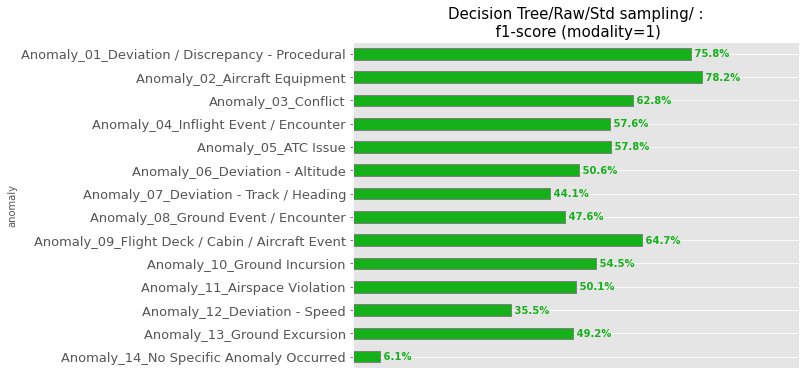

In [74]:
# Call the function on the BERT models only
plot_1_model_all_label_scores(df_model_results = model_results_BASELINE_select_toplot,
                      metric = "f1-score",
                      dict_model_color = dict_model_color
                      ,fig_shape=(8,6))

#### recall

In [ ]:
# # Call the function on the BERT models only
# plot_1_model_all_label_scores(df_model_results = model_results_BASELINE_select_toplot,
#                       metric = "recall",
#                       dict_model_color = dict_model_color)

#### precision

In [ ]:
# # Call the function on the BERT models only
# plot_1_model_all_label_scores(df_model_results = model_results_BASELINE_select_toplot,
#                       metric = "precision",
#                       dict_model_color = dict_model_color)

#### Definition of the df to plot for BERT models

In [ ]:
# Definition of the df to plot : model_results_multilabel_BERT_select_toplot
model_results_multilabel_BERT_select_toplot=model_results_multilabel_BERT_select.copy()
model_results_multilabel_BERT_select_toplot['anomaly']=model_results_multilabel_BERT_select_toplot['anomaly'].replace(dict_anomaly_label_ordered)

#### f1-score

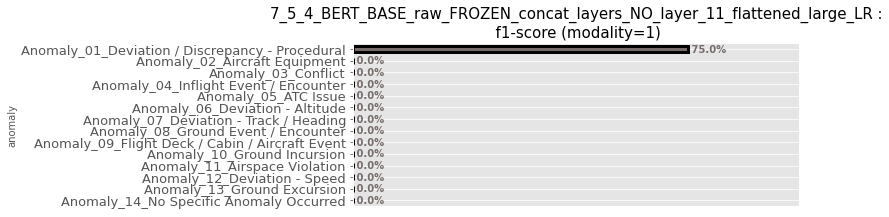

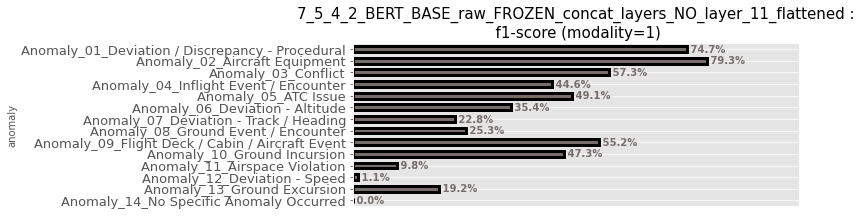

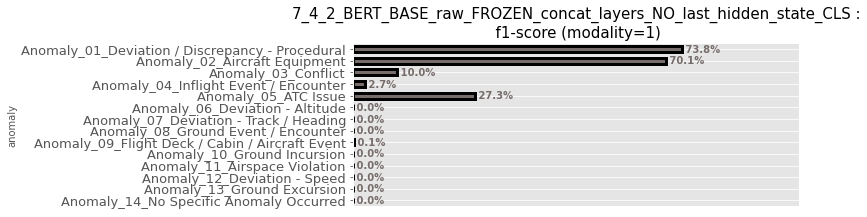

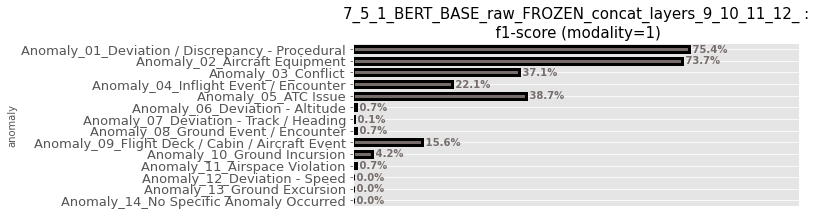

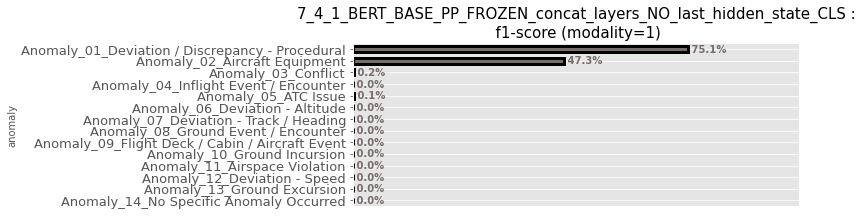

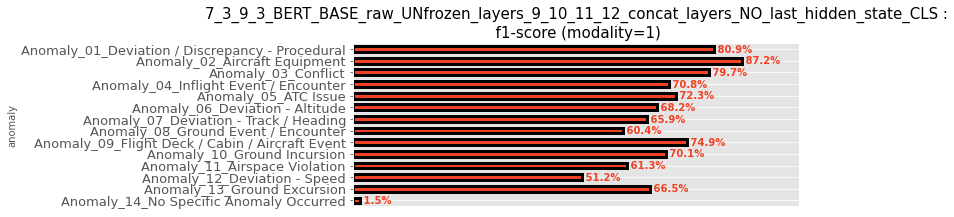

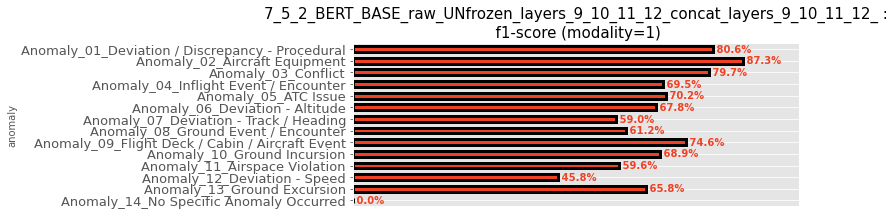

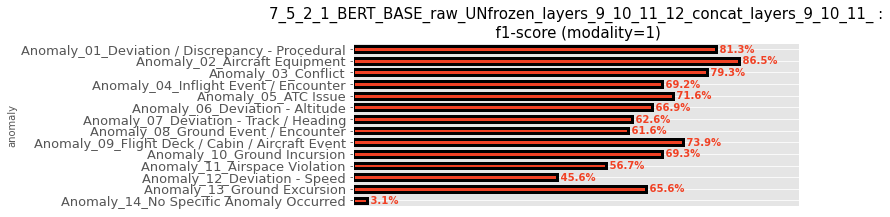

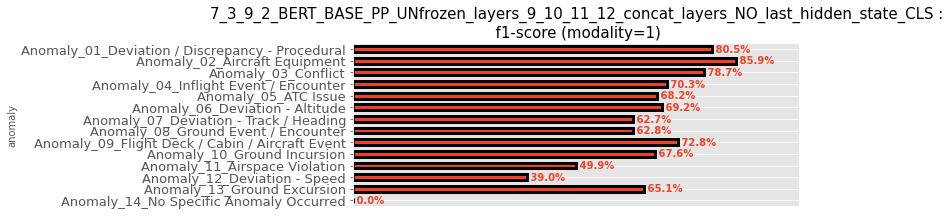

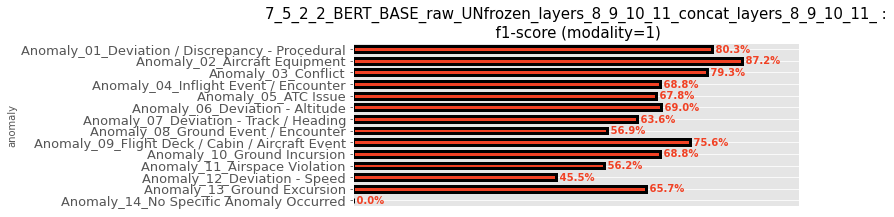

In [ ]:
# Call the function on the BERT models only
plot_1_model_all_label_scores(df_model_results = model_results_multilabel_BERT_select_toplot,
                      metric = "f1-score",
                      dict_model_color = dict_model_color)

#### recall

In [ ]:
# # Call the function on the BERT models only
# plot_1_model_all_label_scores(df_model_results = model_results_multilabel_BERT_select_toplot,
#                       metric = "recall",
#                       dict_model_color = dict_model_color)

#### precision

In [ ]:
# # Call the function on the BERT models only
# plot_1_model_all_label_scores(df_model_results = model_results_multilabel_BERT_select_toplot,
#                       metric = "precision",
#                       dict_model_color = dict_model_color)

# Compare all models for all anomalies

## Dataframe of metric differences with BaseLine models

In [ ]:
model_results.head()


,approach,model_label,classifier,preprocessing,undersampling,anomaly,metric,1,import_order
0,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Deviation / Discrepancy - Procedural,precision,0.705148,0
1,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Deviation / Discrepancy - Procedural,recall,0.819415,0
2,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Deviation / Discrepancy - Procedural,f1-score,0.757999,0
3,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Deviation / Discrepancy - Procedural,support,11651.000000,0
4,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Aircraft Equipment,precision,0.822690,0


In [ ]:
# Root label (source = ASRS coding forms) : order = by descending frequency
Anomaly_RootLabels=['Deviation / Discrepancy - Procedural',
                    'Aircraft Equipment',
                    'Conflict',
                    'Inflight Event / Encounter',
                    'ATC Issue',
                    'Deviation - Altitude',
                    'Deviation - Track / Heading',
                    'Ground Event / Encounter',
                    'Flight Deck / Cabin / Aircraft Event',
                    'Ground Incursion',
                    'Airspace Violation',
                    'Deviation - Speed',
                    'Ground Excursion',
                    'No Specific Anomaly Occurred']
metric_list=['f1-score','recall','precision']


In [ ]:
model_results_diffBLM=pd.DataFrame(columns=model_results.columns)
for metric in metric_list:
  for anomaly_rl in Anomaly_RootLabels :
    anomaly_col='Anomaly_' + anomaly_rl
    model_results_anomaly_metric=model_results[(model_results['anomaly']==anomaly_col)&(model_results['metric']==metric)]
    model_results_anomaly_metric_BLM=model_results_anomaly_metric[model_results_anomaly_metric['model_label']=='Decision Tree/Raw/Std sampling/']
    model_results_anomaly_metric_diffBLM=model_results_anomaly_metric
    blm=model_results_anomaly_metric_BLM['1'].values
    model_results_anomaly_metric_diffBLM['absolute'] = model_results_anomaly_metric_diffBLM['1']
    model_results_anomaly_metric_diffBLM['diff']=model_results_anomaly_metric_diffBLM['1']-blm[0]
    model_results_diffBLM= pd.concat([model_results_diffBLM,
                          model_results_anomaly_metric_diffBLM
                          ], 
                          axis=0)

<ipython-input-82-8f1164baf314>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_results_anomaly_metric_diffBLM['absolute'] = model_results_anomaly_metric_diffBLM['1']
<ipython-input-82-8f1164baf314>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_results_anomaly_metric_diffBLM['diff']=model_results_anomaly_metric_diffBLM['1']-blm[0]


In [ ]:
model_results_diffBLM.head()

,approach,model_label,classifier,preprocessing,undersampling,anomaly,metric,1,import_order,absolute,diff
2,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Deviation / Discrepancy - Procedural,f1-score,0.757999,0,0.757999,0.000000
90,(2) BoW Unsupervised feat. selection,DecisionTreeClassifier/PP/Std sampling/exclude...,DecisionTreeClassifier,1,0,Anomaly_Deviation / Discrepancy - Procedural,f1-score,0.759698,1,0.759698,0.001699
114,(2) BoW Unsupervised feat. selection,Decision Tree/PP/Under sampling/exclude_numeri...,Decision Tree,1,1,Anomaly_Deviation / Discrepancy - Procedural,f1-score,0.675947,2,0.675947,-0.082052
202,(2) BoW Unsupervised feat. selection,DecisionTreeClassifier/PP/Std sampling/exclude...,DecisionTreeClassifier,1,0,Anomaly_Deviation / Discrepancy - Procedural,f1-score,0.757740,3,0.757740,-0.000259
226,(2) BoW Unsupervised feat. selection,DecisionTreeClassifier/PP/Std sampling/exclude...,DecisionTreeClassifier,1,0,Anomaly_Deviation / Discrepancy - Procedural,f1-score,0.757069,4,0.757069,-0.000930


#### Function plot_diff_metric_universal 

In [ ]:
def plot_diff_metric_universal(df_model_results, modality_col,anomaly_list=[],metric="f1-score",dict_model_color={},color_by='model',model_name='model_label'):
    """
    Plots, for each anomaly, the evolution of  "metric" 
    Inputs: 
    - model_results : a df containing the classification report metrics of our different "models" to plot
      Models include : classifier type and modeling options such as  raw/PP narratives, std or under sampling, count_vectorizer options
    - a list of anomaly features : if the list is empty : 
    - metric : one of the model results metrics : "precision", "recall", "f1-score" or "support"
    - dict_color : dictionnary defining a color for each type of model listed (grey if non listed)
     - color_by = 'model' (default or 'approach'
    - model_name = 'model_label'(default) or any columns with a model name   
    Returns:
    - 1 plot per anomaly listed
      - for models using undersampling, the line  of the rectangle is thiner
      - for models using raw narratives (vs PP), the line  of the rectangle is grey instead of black

    """
    if anomaly_list==[] :
      anomaly_list=df_model_results['anomaly'].unique().tolist()
    for anomaly in anomaly_list :
  
      # Anomaly_label without the prefix "Anomaly_"
      anomaly_label=anomaly.replace("Anomaly_", "")  
      
     
      metric_row=metric
      if modality_col == 'absolute': 
        title_ToPlot=anomaly_label+" :\n" + metric
      else:      
        title_ToPlot=anomaly_label+" :\n  Difference of "+ metric+" vs. Baseline model "



      # dataframe containing only the rows to plot
      sub_df = df_model_results[(df_model_results['anomaly'] == anomaly) & (df_model_results['metric'] == metric_row)] .copy()
      # label of the model , including options
      sub_df=sub_df.set_index(model_name)
      # defining color, edgecolot, linewidth of the bar according to the model characteristics
      if color_by=='model' :
        sub_df['color']=sub_df['classifier'].apply(lambda x: dict_model_color[x] if x in list(dict_model_color.keys()) else 'grey')
        sub_df['edgecolor']=sub_df['preprocessing'].apply(lambda x: 'grey' if x==0 else 'black')
        sub_df['linewidth']=sub_df['undersampling'].apply(lambda x: 3 if x==0 else 1)
      elif color_by=='approach' :
        sub_df['color']=sub_df['approach'].apply(lambda x: dict_model_color[x] if x in list(dict_model_color.keys()) else 'grey')
        sub_df['edgecolor']='black'
        sub_df['linewidth']= 1

      # Plot
      fig = plt.figure()
      plt.style.use('ggplot')
      plt.rcParams['axes.titlesize'] = 15
      plt.rcParams['axes.labelsize'] = 10
      plt.rcParams['xtick.labelsize'] = 10
      plt.rcParams['ytick.labelsize'] = 13
      plt.rc('legend', fontsize=10)    # legend fontsize

      
      num_classes = len(sub_df)
      fig_shape=(8,num_classes//3.5)

      colors=list(sub_df['color'])
      edgecolors=list(sub_df['edgecolor'])
      linewidths=list(sub_df['linewidth'])
      iter_color = iter(colors)

      barh=sub_df[modality_col].plot.barh(title=title_ToPlot, 
                                                      ylabel="Topics",
                                                      color=colors,
                                                      edgecolor=edgecolors,
                                                      linewidth=linewidths,
                                                      figsize=fig_shape) # indicative value for BERT models only: (8,7)


 

      # ytick labels in color : according to approach + highlight_best_models
      for ytick, color in zip(barh.get_yticklabels(), colors):
        ytick.set_color(color)
      
      if metric != "support":
        if modality_col == 'absolute': 
          plt.xlim([0, 1])
        else:
          plt.xlim([-1,1])
        plt.xticks([])
        for i, v in enumerate(sub_df[modality_col]):
          c = next(iter_color)
          if v>=0 :
            y=v
          else :
            y=v-0.2
          plt.text(y, i,           # si bar au lieu de barh : inverser v et i
                   " "+str(round(v*100,1))+"%", 
                    color=c, 
                    va='center', 
                    fontweight='bold')
 
      else : 
          for i, v in enumerate(sub_df[modality_col]):
            c = next(iter_color)
            plt.text(v, i,           # si bar au lieu de barh : inverser v et i
                    " "+str(int(v)), 
                    color=c, 
                    va='center', 
                    fontweight='bold')
      plt.ylabel("Approach and Model number", fontsize = 14)
  

#    return barh

##### Example for all anomalies, 1 metric

###### f1-score

In [ ]:
# plot_diff_metric_universal(df_model_results = model_results_diffBLM.sort_values(by = ['import_order'], ascending = False),modality_col='diff',
#                       metric = "f1-score",
#                       dict_model_color = dict_model_color)

In [ ]:
# plot_diff_metric_universal(df_model_results = model_results_diffBLM.sort_values(by = ['import_order'], ascending = False),modality_col='diff',
#                       metric = "f1-score",
#                       dict_model_color = dict_approach_color,
#                       color_by='approach',
#                       model_name='import_order')

In [ ]:
# plot_diff_metric_universal(df_model_results = model_results_diffBLM.sort_values(by = ['import_order'], ascending = False),modality_col='absolute',
#                       metric = "f1-score",
#                       dict_model_color = dict_approach_color,
#                       color_by='approach',
#                       model_name='import_order')

##### Example for 1 anomaly all metrics

In [ ]:
# #anomaly='Anomaly_Aircraft Equipment'
# anomaly='Anomaly_Deviation - Altitude'
# plot_diff_metric_universal(df_model_results=model_results_diffBLM.sort_values(by = ['import_order'], ascending = False),anomaly_list=[anomaly],metric="f1-score",dict_model_color=dict_model_color)
# plot_diff_metric_universal(df_model_results=model_results_diffBLM.sort_values(by = ['import_order'], ascending = False),anomaly_list=[anomaly],metric="recall",dict_model_color=dict_model_color)
# plot_diff_metric_universal(df_model_results=model_results_diffBLM.sort_values(by = ['import_order'], ascending = False),anomaly_list=[anomaly],metric="precision",dict_model_color=dict_model_color)

# Comparing approaches for all anomalies

## Model selection for "BoW Supervised feature selection" approach

In [ ]:
BoW_SFS_Best_model_Dictionnary={
    'Anomaly_Deviation / Discrepancy - Procedural':'Random Forest/PP/Std sampling/impce= 750',
    'Anomaly_Aircraft Equipment':'Random Forest/PP/Under sampling/impce= 750',
    'Anomaly_Conflict':'Gradient Boosting/PP/Under sampling/impce= 100',
    'Anomaly_Inflight Event / Encounter':'Gradient Boosting/PP/Under sampling/impce= 250',
    'Anomaly_ATC Issue':'Gradient Boosting/PP/Under sampling/impce= 250',
    'Anomaly_Deviation - Altitude':'Gradient Boosting/PP/Std sampling/impce= 500',
    'Anomaly_Deviation - Track / Heading':'Gradient Boosting/PP/Std sampling/impce= 100',
    'Anomaly_Ground Event / Encounter':'Gradient Boosting/PP/Std sampling/impce= 250',
    'Anomaly_Flight Deck / Cabin / Aircraft Event':'Random Forest/PP/Std sampling/impce= 50',
    'Anomaly_Ground Incursion':'Random Forest/PP/Std sampling/impce= 30',
    'Anomaly_Airspace Violation':'Random Forest/PP/Std sampling/impce= 30',
    'Anomaly_Deviation - Speed':'Random Forest/PP/Std sampling/impce= 20',
    'Anomaly_Ground Excursion':'Random Forest/PP/Std sampling/impce= 30',
    'Anomaly_No Specific Anomaly Occurred':'Decision Tree/PP/Std sampling/impce= 750'
}

In [ ]:
# We define an empty DF with the same columns as model_results_diffBLM
model_results_diffBLM_bestmodel_BoW_SFS=pd.DataFrame(columns=model_results_diffBLM.columns)

# We loop on anomalies and keep the rows corresponding to the best model (according to the dictionnary) only for the 'BoW Supervised feature selection' appraoch
for anomaly in list(BoW_SFS_Best_model_Dictionnary.keys()) :
  best_model_result= model_results_diffBLM[(model_results_diffBLM['approach']=='(3) BoW Supervised feat. selection')&(model_results_diffBLM['anomaly']==anomaly)&(model_results_diffBLM['model_label']==BoW_SFS_Best_model_Dictionnary[anomaly])]
  model_results_diffBLM_bestmodel_BoW_SFS= pd.concat([model_results_diffBLM_bestmodel_BoW_SFS,
                          best_model_result
                          ], 
                          axis=0)
model_results_diffBLM_bestmodel_BoW_SFS['import_order']=50

In [ ]:
print(len(model_results_diffBLM_bestmodel_BoW_SFS), " should be " , 14 *3)
model_results_diffBLM_bestmodel_BoW_SFS.head()

42  should be  42


,approach,model_label,classifier,preprocessing,undersampling,anomaly,metric,1,import_order,absolute,diff
2914,(3) BoW Supervised feat. selection,Random Forest/PP/Std sampling/impce= 750,Random Forest,1,0,Anomaly_Deviation / Discrepancy - Procedural,f1-score,0.807363,50,0.807363,0.049364
2913,(3) BoW Supervised feat. selection,Random Forest/PP/Std sampling/impce= 750,Random Forest,1,0,Anomaly_Deviation / Discrepancy - Procedural,recall,0.875204,50,0.875204,0.055789
2912,(3) BoW Supervised feat. selection,Random Forest/PP/Std sampling/impce= 750,Random Forest,1,0,Anomaly_Deviation / Discrepancy - Procedural,precision,0.749284,50,0.749284,0.044135
3534,(3) BoW Supervised feat. selection,Random Forest/PP/Under sampling/impce= 750,Random Forest,1,1,Anomaly_Aircraft Equipment,f1-score,0.849528,50,0.849528,0.067908
3533,(3) BoW Supervised feat. selection,Random Forest/PP/Under sampling/impce= 750,Random Forest,1,1,Anomaly_Aircraft Equipment,recall,0.869032,50,0.869032,0.124576


In [ ]:
model_results_diffBLM_bestmodel_BoW_SFS['model_label']='Best BoW Supervised feature selection Model'

In [ ]:
model_results_diffBLM_bestmodel=pd.concat([
                          model_results_diffBLM[(model_results_diffBLM['approach']=='(1) Base line model')],
                          model_results_diffBLM[(model_results_diffBLM['approach']=='(2) BoW Unsupervised feat. selection')],
                          model_results_diffBLM_bestmodel_BoW_SFS,
                          model_results_diffBLM[(model_results_diffBLM['approach']=='(4) Word-Embedding')],
                          model_results_diffBLM[model_results_diffBLM['approach'].isin(['(5) BERT Frozen','(5) BERT Unfrozen'])]
 
                          ], 
                          axis=0)

In [ ]:
model_results_diffBLM_bestmodel.head()

,approach,model_label,classifier,preprocessing,undersampling,anomaly,metric,1,import_order,absolute,diff
2,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Deviation / Discrepancy - Procedural,f1-score,0.757999,0,0.757999,0.0
6,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Aircraft Equipment,f1-score,0.781620,0,0.781620,0.0
10,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Conflict,f1-score,0.628195,0,0.628195,0.0
14,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Inflight Event / Encounter,f1-score,0.576368,0,0.576368,0.0
18,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_ATC Issue,f1-score,0.577700,0,0.577700,0.0


In [ ]:
model_results_diffBLM_bestmodel['approach'].value_counts()

(4) Word-Embedding                      630
(2) BoW Unsupervised feat. selection    588
(5) BERT Frozen                         210
(5) BERT Unfrozen                       210
(1) Base line model                      42
(3) BoW Supervised feat. selection       42
Name: approach, dtype: int64

In [ ]:
model_results_diffBLM_bestmodel['approach and model number']=model_results_diffBLM_bestmodel['approach']+model_results_diffBLM_bestmodel['import_order'].astype(str).apply(lambda x: ' Best model' if (x=='50') else ( ' #'+x if len(x)==2  else ' # '+x ))

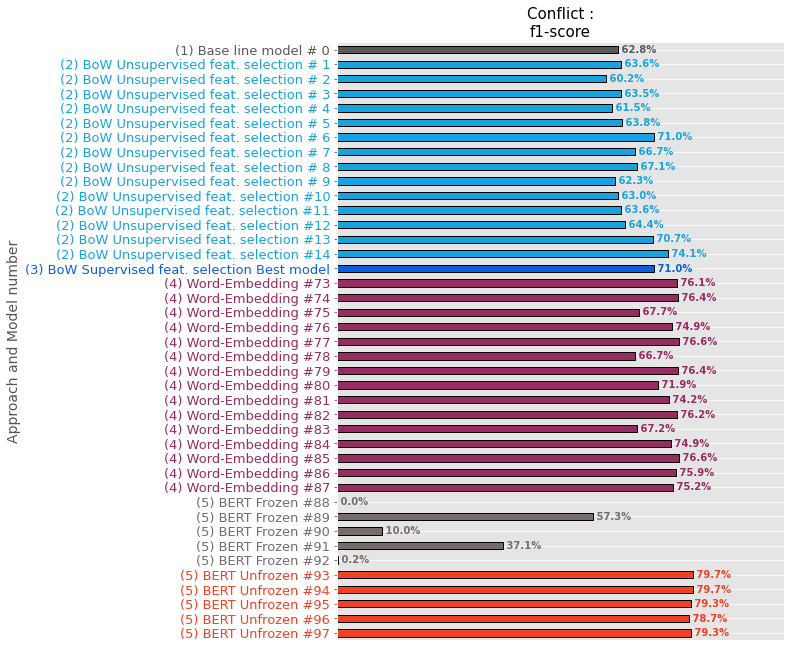

In [ ]:
plot_diff_metric_universal(df_model_results = model_results_diffBLM_bestmodel.sort_values(by = ['import_order'], ascending = False),
                      modality_col='absolute',
                      anomaly_list=['Anomaly_Conflict'],
                      metric = "f1-score",
                      dict_model_color = dict_approach_color,
                      color_by='approach',
                      model_name='approach and model number')

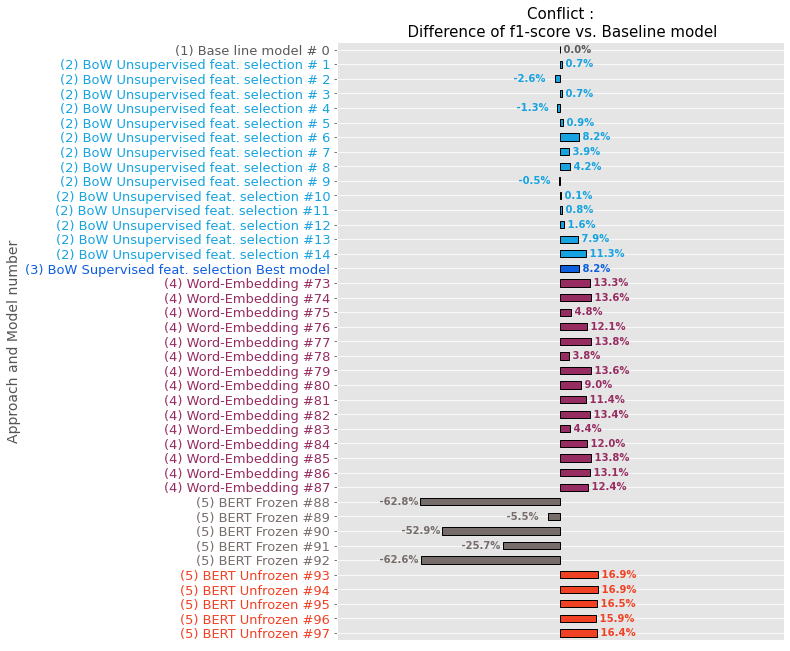

In [ ]:
plot_diff_metric_universal(df_model_results = model_results_diffBLM_bestmodel.sort_values(by = ['import_order'], ascending = False),
                      modality_col='diff',
                      anomaly_list=['Anomaly_Conflict'],
                      metric = "f1-score",
                      dict_model_color = dict_approach_color,
                      color_by='approach',
                      model_name='approach and model number')

# STREAMLIT

## EXPORT DataFrame 1

In [ ]:
model_results_diffBLM_bestmodel.head()

,approach,model_label,classifier,preprocessing,undersampling,anomaly,metric,1,import_order,absolute,diff,approach and model number
2,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Deviation / Discrepancy - Procedural,f1-score,0.757999,0,0.757999,0.0,(1) Base line model # 0
6,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Aircraft Equipment,f1-score,0.781620,0,0.781620,0.0,(1) Base line model # 0
10,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Conflict,f1-score,0.628195,0,0.628195,0.0,(1) Base line model # 0
14,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_Inflight Event / Encounter,f1-score,0.576368,0,0.576368,0.0,(1) Base line model # 0
18,(1) Base line model,Decision Tree/Raw/Std sampling/,Decision Tree,0,0,Anomaly_ATC Issue,f1-score,0.577700,0,0.577700,0.0,(1) Base line model # 0


In [ ]:
model_results_diffBLM_bestmodel['Best approach model']=model_results_diffBLM_bestmodel['model_label'].apply(lambda x: True if x in (['Decision Tree/Raw/Std sampling/' \
                                                        , 'naive bayes_tfidfvectorizer_vocab_size:3000_PP'
                                                        ,'Best BoW Supervised feature selection Model'
                                                        ,'Word_Embedding/PP/Std sampling/'
                                                        ,'7_5_4_2_BERT_BASE_raw_FROZEN_concat_layers_NO_layer_11_flattened'
                                                        ,'7_3_9_3_BERT_BASE_raw_UNfrozen_layers_9_10_11_12_concat_layers_NO_last_hidden_state_CLS'])  else False )

In [ ]:
# Export as .csv
%cd /content/drive/MyDrive/data/transformed/STREAMLIT_demo_data/
model_results_diffBLM_bestmodel.to_csv(r'model_results_diffBLM_bestmodel_20221207.csv')

/content/drive/MyDrive/data/transformed/STREAMLIT_demo_data


In [ ]:
# # Check .csv file
# !ls
# temp_df = pd.read_csv('model_results_diffBLM_bestmodel.csv').drop(columns = ['Unnamed: 0'])
# temp_df['approach'].value_counts()

#### Global comparison of approaches : F1-SCORE

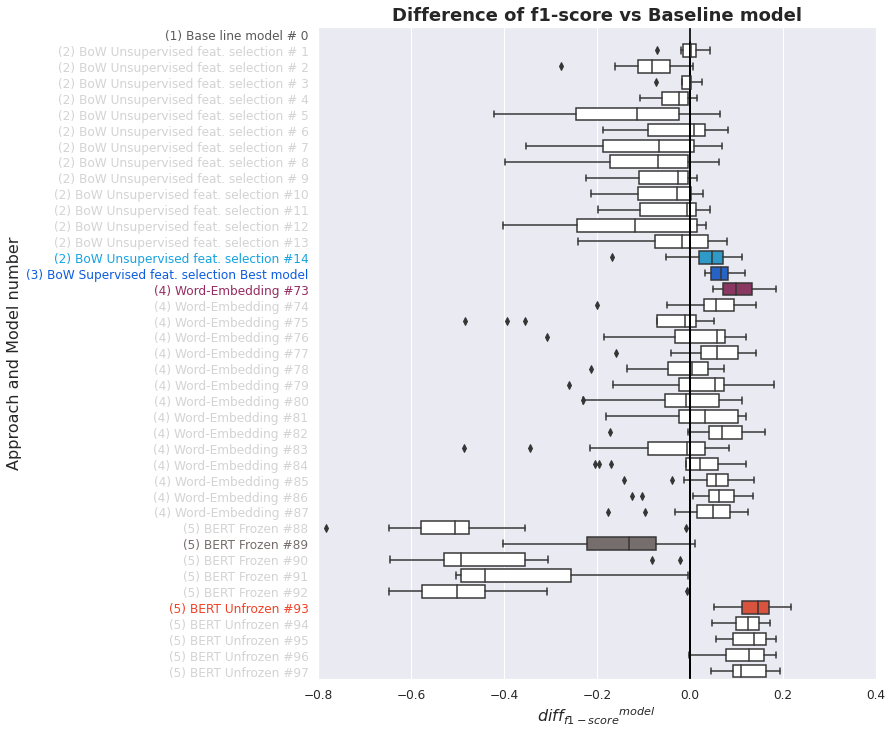

In [ ]:
def catplot_diff_allmodels(highlight_best_models=False):

  sns.set(rc={'figure.figsize':(10,12)})
  sns.set(font_scale = 1.1)
  
  color_approach_model_list=['#595959' ]+[ '#16a3e0' ]* 14 +['#0d5ddf'] + ['#962c61']*15 +[ '#766d6b'] *5+ ['#f14124']*5 
  color_ticks_approach_model_list=color_approach_model_list
  if highlight_best_models:
    color_approach_model_list=['#595959' ]+[ 'w' ]* 13+['#16a3e0'] +['#0d5ddf'] + ['#962c61'] +[ 'w' ] *14 +[ 'w']+[ '#766d6b']+[ 'w'] *3+ ['#f14124']+[ 'w' ] *4 
    color_ticks_approach_model_list=['#595959' ]+[ '#d3d3d3' ]* 13+['#16a3e0'] +['#0d5ddf'] + ['#962c61'] +[ '#d3d3d3' ] *14 +[ '#d3d3d3']+[ '#766d6b']+[ '#d3d3d3'] *3+ ['#f14124']+[ '#d3d3d3' ] *4 
  
  approach_model_palette=sns.color_palette(color_approach_model_list)
  
  boxplot=sns.boxplot(data=model_results_diffBLM_bestmodel[(model_results_diffBLM_bestmodel['metric']=='f1-score')&(model_results_diffBLM_bestmodel['anomaly']!='Anomaly_No Specific Anomaly Occurred')],
              y='approach and model number',
              x='diff',
              #kind ='box',
              orient='h',
            #  height=8, 
              palette=approach_model_palette)
  
  # ytick labels in color : according to approach + highlight_best_models
  for ytick, color in zip(boxplot.get_yticklabels(), color_ticks_approach_model_list):
    ytick.set_color(color)
  
  # Limits min/max of x-axis
  boxplot.set(xlim=(-0.8, 0.4))
  
  # Titles
  #boxplot.set_xlabel("diff_f1_score", fontsize = 16)
  boxplot.set_xlabel('$\t{​diff}​_{​\t{​ f1-score}​}​^{​\t{​ model}​}​$', fontsize = 16)
  boxplot.set_ylabel("Approach and Model number", fontsize = 16)
  boxplot.set_title("Difference of f1-score vs Baseline model", fontsize = 18, weight='bold')
  
  
  ## Les 2 lignes en LateX ci-dessous ne marchent pas ...
  #boxplot.set(xlabel=r'$\text{​​​​​​diff}​​​​​​_{​​​​​​\text{​​​​​​ f1-score}​​​​​​}​​​​​​^{​​​​​​\text{​​​​​​ model}​​​​​​}​​​​​​$ [s]')
  #boxplot.set(xlabel=r'$\text{​diff}​_{​\text{​ f1-score}​}​^{​\text{​ model}​}​$')
  
  # Vertical bar in black
  boxplot.axvline(0, ls='-',color='black',linewidth=2)

  return boxplot

  


catplot_diff_allmodels(True);

#### BEST MODEL

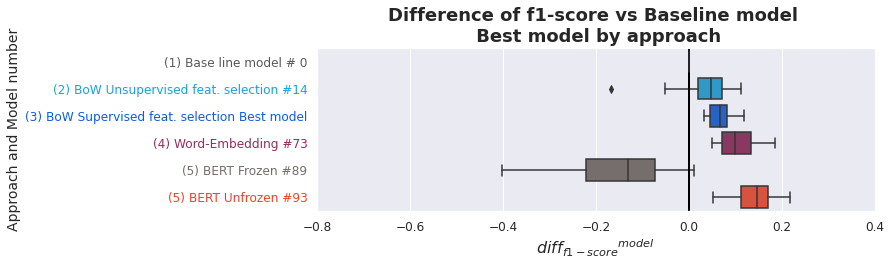

In [ ]:
def catplot_diff_bestmodels():
  # FOCUS ON BEST MODELS FOR EACH APPROACH
  sns.set(rc={'figure.figsize':(10,3)})
  sns.set(font_scale = 1.1)

  color_approach_list=['#595959',  '#16a3e0', '#0d5ddf', '#962c61', '#766d6b', '#f14124' ]
  approach_palette=sns.color_palette(color_approach_list)
  boxplot=sns.boxplot(data=model_results_diffBLM_bestmodel[(model_results_diffBLM_bestmodel['metric']=='f1-score') \
                                                  &(model_results_diffBLM_bestmodel['Best approach model']==True) \
                    
                                                  &(model_results_diffBLM_bestmodel['anomaly']!='Anomaly_No Specific Anomaly Occurred')] \
              ,y='approach and model number',x='diff' ,orient='h', palette=approach_palette)
  
  # ytick labels in color : according to approach + highlight_best_models
  for ytick, color in zip(boxplot.get_yticklabels(), color_approach_list):
      ytick.set_color(color)

  
  # Limits min/max of x-axis
  boxplot.set(xlim=(-0.8, 0.4))
  
  
  # Titles
  #boxplot.set_xlabel("diff_f1_score", fontsize = 14)
  boxplot.set_xlabel('$\t{​diff}​_{​\t{​ f1-score}​}​^{​\t{​ model}​}​$', fontsize = 16)
  boxplot.set_ylabel("Approach and Model number", fontsize = 14)
  boxplot.set_title("Difference of f1-score vs Baseline model \n Best model by approach", fontsize = 18, weight='bold')
 
  
  # Vertical bar in black
  boxplot.axvline(0, ls='-',color='black',linewidth=2)

  return boxplot

catplot_diff_bestmodels();

barplot 14 anomalies, like Yannis did for error analysis

baseline model (DT) data: model_results_BASELINE_select_toplot in gray

best BERT model (7_3_9_3) in red
(use AeroBot charte graphique)

Rename the models to 'baseline model (DT)' and 'best transformer (BERT) model

## baseline vs. best BERT

## EXPORT DataFrame 2

In [ ]:
best_BERT_results = model_results_multilabel_BERT_select[model_results_multilabel_BERT_select['model_label'].str.contains('7_3_9_3')]

baseline_results = model_results_BASELINE_select_toplot

df_temp = pd.concat([best_BERT_results, baseline_results])
df_temp['anomaly'] = df_temp['anomaly'].str.replace('Anomaly_', '')

In [ ]:
# Rename models and anomaly labels (for BERT)
name_dict = {'Decision Tree/Raw/Std sampling/': 'baseline model (DT)',
             '7_3_9_3_BERT_BASE_raw_UNfrozen_layers_9_10_11_12_concat_layers_NO_last_hidden_state_CLS': 'best transformer'}

anomalies_dict = {
 'Deviation / Discrepancy - Procedural': '01_Deviation / Discrepancy - Procedural',
 'Aircraft Equipment': '02_Aircraft Equipment',
 'Conflict': '03_Conflict',
 'Inflight Event / Encounter': '04_Inflight Event / Encounter',
 'ATC Issue': '05_ATC Issue',
 'Deviation - Altitude': '06_Deviation - Altitude',
 'Deviation - Track / Heading': '07_Deviation - Track / Heading',
 'Ground Event / Encounter': '08_Ground Event / Encounter',
 'Flight Deck / Cabin / Aircraft Event': '09_Flight Deck / Cabin / Aircraft Event',
 'Ground Incursion': '10_Ground Incursion',
 'Airspace Violation': '11_Airspace Violation',
 'Deviation - Speed': '12_Deviation - Speed',
 'Ground Excursion': '13_Ground Excursion',
 'No Specific Anomaly Occurred': '14_No Specific Anomaly Occurred'}

df_temp['model_label'] = df_temp['model_label'].replace(name_dict)
df_temp['anomaly'] = df_temp['anomaly'].replace(anomalies_dict)
base_line_vs_BERT_results = df_temp.sort_values(by = 'anomaly')

In [ ]:
!pwd

/content/drive/MyDrive/data/transformed/STREAMLIT_demo_data


In [ ]:
# # Export as .csv
# %cd /content/drive/MyDrive/data/transformed/STREAMLIT_demo_data/
# base_line_vs_BERT_results.to_csv(r'baseline_vs_best_BERT.csv')

## Plot tests

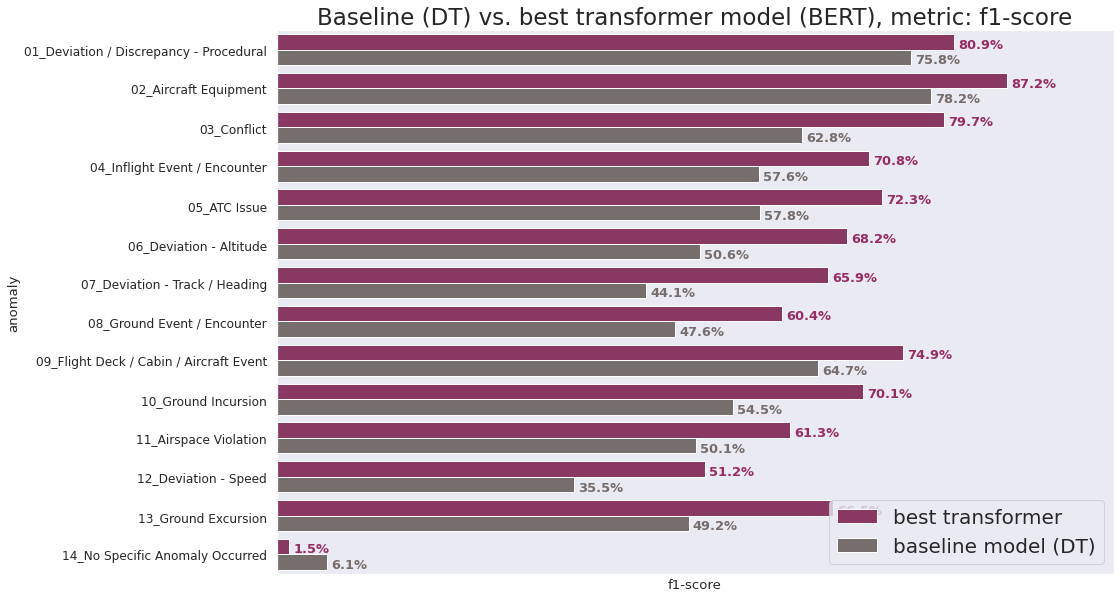

In [ ]:
def my_plot():
  fig = plt.figure(figsize = (15,10))
  palette = sns.color_palette(["#962c61", "#766d6b"]) #gray: 766d6b, "#16a3e0",

  df_for_barplot = base_line_vs_BERT_results[(base_line_vs_BERT_results['metric'] == metric)]
  b = sns.barplot(data = df_for_barplot, x = '1', y = 'anomaly', 
                  hue = 'model_label',
                  palette = palette)

  # Train set
  df_temp1 = df_for_barplot[df_for_barplot['model_label'] == 'best transformer']
  for i, v in zip(range(len(df_temp1['anomaly'])), df_temp1['1']):
    plt.text(v+0.005, i-.05,           
            str(np.round(100*v,1))+'%', 
            color="#962c61", 
            va='baseline', 
            fontweight='bold',
            fontsize = 13)
    
  # Final test set  
  df_temp1 = df_for_barplot[df_for_barplot['model_label'] == 'baseline model (DT)']
  for i, v in zip(range(len(df_temp1['anomaly'])), df_temp1['1']):
    plt.text(v+0.005, i+.1,       
            str(np.round(100*v,1))+'%', 
            color="#766d6b", 
            va='top', 
            fontweight='bold',
            fontsize = 13)

  plt.rcParams['axes.titlesize'] = 23
  plt.rcParams['axes.labelsize'] = 23
  plt.rcParams['ytick.labelsize'] = 23
  plt.rc('legend', fontsize=20)    # legend fontsize

  b.legend_.set_title(None)
  plt.legend(loc='lower right')
  # b.legend().set_visible(False)
  plt.xlim([0,1])
  plt.xticks([])
  plt.xlabel(metric)
  plt.title(f'Baseline (DT) vs. best transformer model (BERT), metric: {metric}')

  return fig

for metric in ['f1-score']:
  fig = my_plot()

<ipython-input-110-8f146b7cb0ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_for_barplot = base_line_vs_BERT_results[(df_temp['metric'] == metric)]


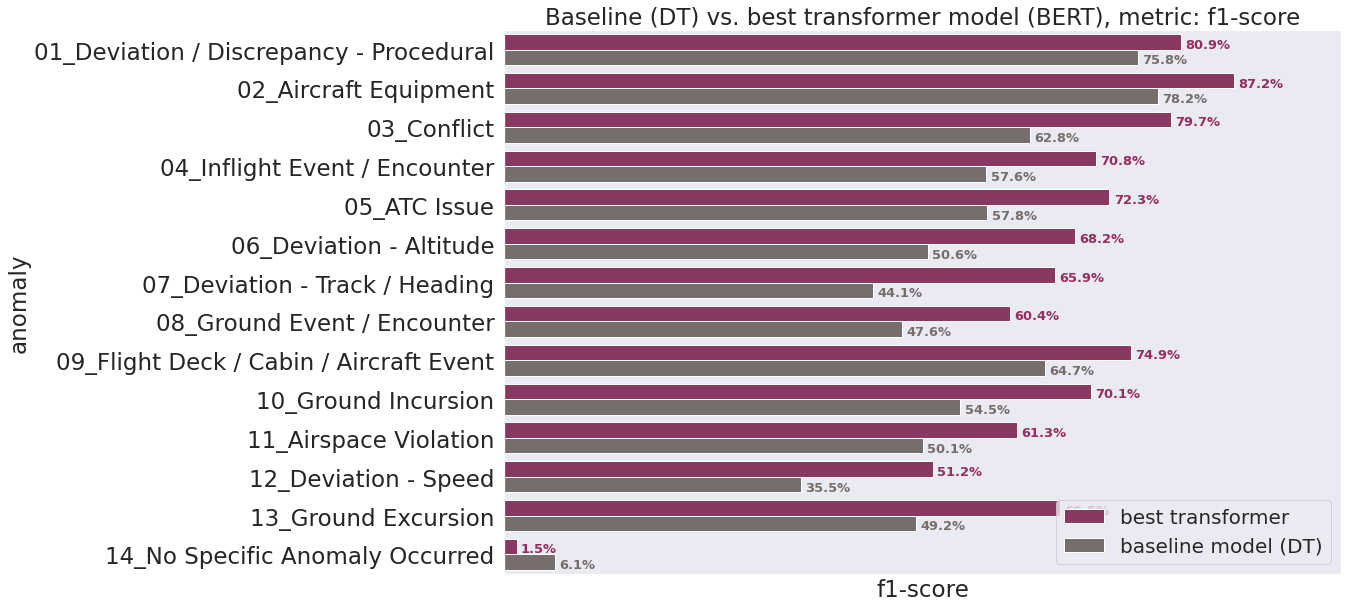

In [ ]:
import seaborn as sns

# df_temp = model_results_diffBLM_bestmodel[(model_results_diffBLM_bestmodel['model_label'] == 'baseline model (DT)') | (model_results_diffBLM_bestmodel['model_label'] == 'best transformer')]

for metric in ['f1-score']:
  fig = plt.figure(figsize = (15,10))
  palette = sns.color_palette(["#962c61", "#766d6b"]) #gray: 766d6b, "#16a3e0",

  df_for_barplot = base_line_vs_BERT_results[(df_temp['metric'] == metric)]
  b = sns.barplot(data = df_for_barplot, x = '1', y = 'anomaly', 
                  hue = 'model_label',
                  palette = palette)

  # Train set
  df_temp1 = df_for_barplot[df_for_barplot['model_label'] == 'best transformer']
  for i, v in zip(range(len(df_temp1['anomaly'])), df_temp1['1']):
    plt.text(v+0.005, i-.05,           
            str(np.round(100*v,1))+'%', 
            color="#962c61", 
            va='baseline', 
            fontweight='bold',
            fontsize = 13)
    
  # Final test set  
  df_temp1 = df_for_barplot[df_for_barplot['model_label'] == 'baseline model (DT)']
  for i, v in zip(range(len(df_temp1['anomaly'])), df_temp1['1']):
    plt.text(v+0.005, i+.1,       
            str(np.round(100*v,1))+'%', 
            color="#766d6b", 
            va='top', 
            fontweight='bold',
            fontsize = 13)
  
  plt.rcParams['axes.titlesize'] = 23
  plt.rcParams['axes.labelsize'] = 23
  plt.rcParams['ytick.labelsize'] = 23
  plt.rc('legend', fontsize=20)    # legend fontsize

  b.legend_.set_title(None)
  plt.legend(loc='lower right')
  # b.legend().set_visible(False)
  plt.xlim([0,1])
  plt.xticks([])
  plt.xlabel(metric)
  plt.title(f'Baseline (DT) vs. best transformer model (BERT), metric: {metric}');